# I. Tiền xử lý

# Tiền Xử Lý Dữ Liệu Lương Kỹ Sư ML

## Mục tiêu
Notebook này thực hiện tiền xử lý dữ liệu lương trong ngành ML để chuẩn bị cho các tác vụ:
- **Phân lớp (Classification)**: Dự đoán mức lương theo category
- **Hồi quy (Regression)**: Dự đoán mức lương chính xác
- **Gom cụm (Clustering)**: Nhóm các nhân viên có mức lương tương tự

## Các bước thực hiện
1. Import thư viện và load dataset
2. Làm sạch dữ liệu (Data Cleaning)
3. Biến đổi dữ liệu (Data Transformation)
4. Thu giảm dữ liệu (Data Reduction)
5. Rời rạc hóa dữ liệu (Data Discretization)
6. Lưu dataset đã được xử lý

## 1. Import Libraries và Load Dataset

### Nhận xét
Chúng ta import các thư viện cần thiết cho việc xử lý dữ liệu, phân tích và trực quan hóa. Pandas để xử lý dataframe, numpy cho tính toán số học, matplotlib và seaborn cho trực quan hóa, sklearn cho machine learning preprocessing.

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy import stats

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Đã import thành công các thư viện!")

Đã import thành công các thư viện!


In [ ]:
# Load dataset
df = pd.read_csv('data/salaries.csv')

# Khám phá cơ bản về dataset
print("=== THÔNG TIN CƠ BẢN VỀ DATASET ===")
print(f"Kích thước dataset: {df.shape}")
print(f"Số dòng: {df.shape[0]:,}")
print(f"Số cột: {df.shape[1]}")
print("\n=== CÁC CỘT TRONG DATASET ===")
print(df.columns.tolist())
print("\n=== KIỂU DỮ LIỆU ===")
print(df.dtypes)
print("\n=== 5 DÒNG ĐẦU TIÊN ===")
df.head()

=== THÔNG TIN CƠ BẢN VỀ DATASET ===
Kích thước dataset: (16494, 11)
Số dòng: 16,494
Số cột: 11

=== CÁC CỘT TRONG DATASET ===
['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

=== KIỂU DỮ LIỆU ===
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

=== 5 DÒNG ĐẦU TIÊN ===


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


In [ ]:
# Thông tin chi tiết về dataset
print("=== THÔNG TIN CHI TIẾT ===")
print(df.info())
print("\n=== THỐNG KÊ MÔ TẢ ===")
df_numeric = df.select_dtypes(include=[np.number])
print(df_numeric.describe())
# print(df.describe())
print("\n=== SỐ LƯỢNG GIÁ TRỊ UNIQUE TRONG MỖI CỘT ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} giá trị unique")

=== THÔNG TIN CHI TIẾT ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB
None

=== THỐNG KÊ MÔ TẢ ===
          work_year        salary  salary_in_usd  remote_ratio
count  16494.000000  1.649400e+04   16494.000000  16494.000000
mean    2023.224991  1.637878e+05  

## 2. Data Cleaning (Làm sạch dữ liệu)

### Nhận xét
Bước này rất quan trọng để đảm bảo chất lượng dữ liệu. Chúng ta cần:
- Kiểm tra và xử lý missing values
- Loại bỏ duplicate records
- Phát hiện và xử lý outliers
- Kiểm tra tính nhất quán của dữ liệu

### 2.1 Kiểm tra missing values

In [ ]:
missing_values = df.isnull().sum()
print("Số lượng missing values trong mỗi cột:")
print(missing_values)
print(f"\nTổng số missing values: {missing_values.sum()}")
print(f"Tỷ lệ missing values: {(missing_values.sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

Số lượng missing values trong mỗi cột:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Tổng số missing values: 0
Tỷ lệ missing values: 0.00%


In [ ]:
duplicates = df.duplicated().sum()
print(f"Số lượng duplicate records: {duplicates}")
if duplicates > 0:
    print("Một vài dòng duplicate:")
    print(df[df.duplicated()].head(10))
# Không loại bỏ duplicates vì chúng có ý nghĩa trong dataset này


Số lượng duplicate records: 6401
Một vài dòng duplicate:
     work_year experience_level employment_type          job_title  salary  \
111       2024               SE              FT   Research Analyst  130000   
207       2024               SE              FT     Data Scientist  146000   
227       2024               SE              FT        ML Engineer   25000   
228       2024               SE              FT     Data Scientist  155000   
262       2024               MI              FT     Data Scientist  110000   
263       2024               MI              FT     Data Scientist   90000   
266       2024               MI              FT  Applied Scientist  222200   
267       2024               MI              FT  Applied Scientist  136000   
285       2024               MI              FT       Data Analyst   77280   
286       2024               MI              FT       Data Analyst   58000   

    salary_currency  salary_in_usd employee_residence  remote_ratio  \
111          

Có 6401 duplicate records, nhưng chúng được giữ lại do:
- Nhiều người có thể có cùng vị trí, level kinh nghiệm và mức lương trong cùng một công ty
- Dữ liệu trùng lặp giúp bảo toàn phân phối thực tế của các tổ hợp lương-vị trí

### 2.3 Kiểm tra tính nhất quán của dữ liệu

In [ ]:
# Kiểm tra các giá trị âm hoặc bằng 0 trong salary
print("Số lượng salary <= 0:", (df['salary'] <= 0).sum())
print("Số lượng salary_in_usd <= 0:", (df['salary_in_usd'] <= 0).sum())

# Kiểm tra work_year
print("\nCác năm trong dataset:", sorted(df['work_year'].unique()))

# Kiểm tra các categorical variables
print("\n=== CÁC GIÁ TRỊ CATEGORICAL ===")
categorical_cols = ['experience_level', 'employment_type', 'company_size',
                    'remote_ratio']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Số lượng salary <= 0: 0
Số lượng salary_in_usd <= 0: 0

Các năm trong dataset: [2020, 2021, 2022, 2023, 2024]

=== CÁC GIÁ TRỊ CATEGORICAL ===

experience_level:
experience_level
SE    10652
MI     4024
EN     1319
EX      499
Name: count, dtype: int64

employment_type:
employment_type
FT    16414
PT       38
CT       28
FL       14
Name: count, dtype: int64

company_size:
company_size
M    15268
L     1038
S      188
Name: count, dtype: int64

remote_ratio:
remote_ratio
0      11084
100     5161
50       249
Name: count, dtype: int64


* Nhận xét: Các biến phân loại không có giá trị bất thường.

### 2.4 Kiểm tra outliers của lương

In [ ]:
def detect_outliers_iqr(data, column):
    """Phát hiện outliers sử dụng IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Phát hiện outliers trong salary_in_usd
outliers, lower_bound, upper_bound = detect_outliers_iqr(df, 'salary_in_usd')
print(f"Số lượng outliers trong salary_in_usd: {len(outliers)}")
print(f"Lower bound: ${lower_bound:,.0f}")
print(f"Upper bound: ${upper_bound:,.0f}")
print(f"Tỷ lệ outliers chiếm: {len(outliers)/len(df)*100:.2f}% dataset")

# Hiển thị một số outliers
if len(outliers) > 0:
    print("\nMột vài outliers:")
    print(outliers[['job_title', 'salary_in_usd', 'experience_level', 'company_size']].head(10))

Số lượng outliers trong salary_in_usd: 284
Lower bound: $-25,056
Upper bound: $312,474
Tỷ lệ outliers chiếm: 1.72% dataset

Một vài outliers:
                     job_title  salary_in_usd experience_level company_size
269             Data Scientist         385000               SE            M
345  Machine Learning Engineer         370000               SE            M
353         Analytics Engineer         720000               SE            M
589         Analytics Engineer         500000               SE            M
713  Machine Learning Engineer         336000               SE            M
765             Data Scientist         322100               SE            M
769  Machine Learning Engineer         370000               SE            M
888          Research Engineer         485000               SE            M
978       Data Science Manager         314100               SE            M
992  Machine Learning Engineer         355000               SE            M


* Nhận xét: Bộ dữ liệu gốc đã khá sạch nên không cần bỏ bớt quan sát nào.

## 3. Data Transformation (Biến đổi dữ liệu)

### Nhận xét
Biến đổi dữ liệu để chuẩn bị cho khai phá dữ liệu:
- **Label Encoding**: Chuyển đổi categorical variables thành số
- **One-Hot Encoding**: Tạo binary variables cho categorical data
- **Standardization**: Chuẩn hóa dữ liệu số về cùng scale
- **Feature Engineering**: Tạo features mới từ dữ liệu có sẵn

In [ ]:
# Tạo bản sao để transform
df_transformed = df.copy()

print("=== ENCODING CATEGORICAL VARIABLES ===")
# ordinal columns là các cột (biến) trong dữ liệu mà giá trị của chúng thuộc về các nhóm/phân loại có thứ tự
# Label Encoding cho ordinal variables
label_encoders = {}
ordinal_cols = ['experience_level', 'company_size']

# Định nghĩa thứ tự cho ordinal variables
experience_order = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}  # Entry -> Mid -> Senior -> Executive
company_size_order = {'S': 0, 'M': 1, 'L': 2}  # Small -> Medium -> Large

# Apply mapping
df_transformed['experience_level_encoded'] = df_transformed['experience_level'].map(experience_order)
df_transformed['company_size_encoded'] = df_transformed['company_size'].map(company_size_order)

print("Đã encode experience_level và company_size theo thứ tự logical")

# One-Hot Encoding là quá trình chuyển đổi một biến phân loại thành nhiều biến nhị phân, mỗi biến nhị phân tương ứng với một giá trị duy nhất của biến ban đầu
# One-Hot Encoding cho nominal variables
nominal_cols = ['employment_type']
for col in nominal_cols:
    dummies = pd.get_dummies(df_transformed[col], prefix=col)
    df_transformed = pd.concat([df_transformed, dummies], axis=1)
    print(f"Đã tạo one-hot encoding cho {col}: {list(dummies.columns)}")

print(f"\nKích thước sau khi encoding: {df_transformed.shape}")

=== ENCODING CATEGORICAL VARIABLES ===
Đã encode experience_level và company_size theo thứ tự logical
Đã tạo one-hot encoding cho employment_type: ['employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT']

Kích thước sau khi encoding: (16494, 17)


In [ ]:
print("=== FEATURE ENGINEERING ===")

# Tạo feature mới: Salary range categories
def categorize_salary(salary):
    if salary < 50000:
        return 'Low'
    elif salary < 100000:
        return 'Medium'
    elif salary < 200000:
        return 'High'
    else:
        return 'Very High'

df_transformed['salary_category'] = df_transformed['salary_in_usd'].apply(categorize_salary)

# Tạo feature: Remote work type
def categorize_remote(ratio):
    if ratio == 0:
        return 'On-site'
    elif ratio == 50:
        return 'Hybrid'
    else:
        return 'Fully'

df_transformed['remote_type'] = df_transformed['remote_ratio'].apply(categorize_remote)

# Tạo feature: Years since data collection (tính từ 2024)

print("Đã tạo các features mới:")
print("- salary_category: Phân loại mức lương")
print("- remote_type: Loại hình làm việc từ xa")

# Kiểm tra distribution của features mới
print("\n=== DISTRIBUTION CỦA FEATURES MỚI ===")
for col in ['salary_category', 'remote_type']:
    print(f"\n{col}:")
    print(df_transformed[col].value_counts())

=== FEATURE ENGINEERING ===
Đã tạo các features mới:
- salary_category: Phân loại mức lương
- remote_type: Loại hình làm việc từ xa

=== DISTRIBUTION CỦA FEATURES MỚI ===

salary_category:
salary_category
High         9333
Very High    3397
Medium       3196
Low           568
Name: count, dtype: int64

remote_type:
remote_type
On-site    11084
Fully       5161
Hybrid       249
Name: count, dtype: int64


In [ ]:
print("=== STANDARDIZATION ===")

# Chọn numerical columns để standardize
numerical_cols = ['salary', 'salary_in_usd']

# Tạo scaler
scaler = StandardScaler()

# Standardize numerical columns
for col in numerical_cols:
    if col in df_transformed.columns:
        df_transformed[f'{col}_scaled'] = scaler.fit_transform(df_transformed[[col]])
        print(f"Đã standardize {col}")

print(f"\nKích thước sau transformation: {df_transformed.shape}")

# Hiển thị thống kê của scaled features
print("\n=== THỐNG KÊ CỦA SCALED FEATURES ===")
scaled_cols = [col for col in df_transformed.columns if col.endswith('_scaled')]
print(df_transformed[scaled_cols].describe())

=== STANDARDIZATION ===
Đã standardize salary
Đã standardize salary_in_usd

Kích thước sau transformation: (16494, 21)

=== THỐNG KÊ CỦA SCALED FEATURES ===
       salary_scaled  salary_in_usd_scaled
count   1.649400e+04          1.649400e+04
mean    3.790940e-17          4.997148e-17
std     1.000030e+00          1.000030e+00
min    -4.397874e-01         -1.966218e+00
25%    -1.814133e-01         -7.034480e-01
50%    -6.338331e-02         -1.228007e-01
75%     6.915748e-02          5.281606e-01
max     8.877562e+01          9.491284e+00


## 4. Data Reduction (Thu giảm dữ liệu)

### Nhận xét
Thu giảm dữ liệu để:
- **Feature Selection**: Loại bỏ features không cần thiết hoặc dư thừa
- **Dimensionality Reduction**: Sử dụng PCA để giảm số chiều
- **Sampling**: Giảm số lượng samples nếu cần thiết

Việc thu giảm dữ liệu giúp giảm computational cost và tránh overfitting.

In [ ]:
print("=== FEATURE SELECTION ===")

# Tạo dataset cho feature selection
df_reduced = df_transformed.copy()

# Loại bỏ columns không cần thiết cho ML
columns_to_drop = [
    'salary',  # Đã có salary_in_usd
    'salary_currency',  # Đã có salary_in_usd
    'employee_residence',  # Có thể có quá nhiều categories
    'company_location',   # Có thể có quá nhiều categories
    'job_title'  # Có quá nhiều categories
]

# Kiểm tra xem columns có tồn tại không trước khi drop
existing_cols_to_drop = [col for col in columns_to_drop if col in df_reduced.columns]
df_reduced = df_reduced.drop(columns=existing_cols_to_drop)
print(f"Đã loại bỏ {len(existing_cols_to_drop)} columns: {existing_cols_to_drop}")

print(f"\nKích thước sau feature selection: {df_reduced.shape}")

=== FEATURE SELECTION ===
Đã loại bỏ 5 columns: ['salary', 'salary_currency', 'employee_residence', 'company_location', 'job_title']

Kích thước sau feature selection: (16494, 16)


In [ ]:
print("=== DIMENSIONALITY REDUCTION VỚI PCA ===")

# Chuẩn bị dữ liệu cho PCA - chỉ sử dụng numerical features
numerical_features_for_pca = [
    'salary_in_usd_scaled', 'remote_ratio',
    'experience_level_encoded', 'company_size_encoded'
]

# Lọc các features tồn tại
available_features = [col for col in numerical_features_for_pca if col in df_reduced.columns]
print(f"Features sử dụng cho PCA: {available_features}")

if len(available_features) > 2:
    # Chuẩn bị dữ liệu
    X_pca = df_reduced[available_features].dropna()

    # Áp dụng PCA
    pca = PCA()
    X_pca_transformed = pca.fit_transform(X_pca)

    # Phân tích explained variance
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)

    # Tỷ lệ thông tin (phương sai) mà mỗi cột mới (PC) giữ lại từ dữ liệu gốc
    print(f"\nExplained variance ratio cho mỗi component:")
    for i, var in enumerate(explained_variance_ratio):
        print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

    #  Tổng tỷ lệ thông tin giữ lại nếu dùng nhiều cột PC.
    print(f"\nCumulative explained variance:")
    for i, cum_var in enumerate(cumulative_variance):
        print(f"PC1-PC{i+1}: {cum_var:.4f} ({cum_var*100:.2f}%)")

    # Chọn số components giữ lại 95% variance
    n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
    print(f"\nSố components cần thiết để giữ 95% variance: {n_components_95}")

    # Tạo PCA với số components tối ưu
    pca_optimal = PCA(n_components=n_components_95)
    X_pca_reduced = pca_optimal.fit_transform(X_pca)

    # Thêm PCA components vào dataset
    for i in range(n_components_95):
        df_reduced.loc[X_pca.index, f'PC{i+1}'] = X_pca_reduced[:, i]

    print(f"Đã thêm {n_components_95} PCA components vào dataset")
else:
    print("Không đủ features để thực hiện PCA")

print(f"\nKích thước sau dimensionality reduction: {df_reduced.shape}")

=== DIMENSIONALITY REDUCTION VỚI PCA ===
Features sử dụng cho PCA: ['salary_in_usd_scaled', 'remote_ratio', 'experience_level_encoded', 'company_size_encoded']

Explained variance ratio cho mỗi component:
PC1: 0.9993 (99.93%)
PC2: 0.0005 (0.05%)
PC3: 0.0002 (0.02%)
PC4: 0.0000 (0.00%)

Cumulative explained variance:
PC1-PC1: 0.9993 (99.93%)
PC1-PC2: 0.9998 (99.98%)
PC1-PC3: 1.0000 (100.00%)
PC1-PC4: 1.0000 (100.00%)

Số components cần thiết để giữ 95% variance: 1
Đã thêm 1 PCA components vào dataset

Kích thước sau dimensionality reduction: (16494, 17)


**Lưu ý khi chọn biến cho PCA:**
- Chỉ nên giữ một biến lương đã chuẩn hóa (salary_in_usd_scaled).
- Các biến encoded như experience_level_encoded và company_size_encoded có thể coi là tuyến tính vì thứ tự của chúng có ý nghĩa thực tế.
- remote_ratio có thể đưa vào PCA nếu vì tin rằng thứ tự 0 < 50 < 100 phản ánh mức độ làm việc từ xa khiến lương tăng dần và tác động tuyến tính đến các đặc trưng khác.

**Vì sao cần giảm số chiều dữ liệu (feature selection)?**
- Việc loại bỏ các cột như `job_title`, `salary_currency`, `employee_residence`, `company_location` giúp giảm số chiều dữ liệu, tránh tăng số lượng feature không cần thiết, giảm nhiễu và chi phí tính toán.
- Đặc biệt, các cột có nhiều giá trị unique như `job_title` nếu one-hot encoding sẽ làm tăng số chiều rất lớn, gây khó khăn cho mô hình hóa.
- Giảm số chiều giúp các mô hình hồi quy, phân loại và gom cụm hoạt động hiệu quả hơn, tránh overfitting và dễ giải thích hơn.

## 5. Data Discretization (Rời rạc hóa dữ liệu)

### Nhận xét
Rời rạc hóa dữ liệu liên tục thành các khoảng rời rạc có lợi ích:
- **Interpretability**: Dễ hiểu và giải thích hơn
- **Noise reduction**: Giảm nhiễu trong dữ liệu
- **Pattern recognition**: Dễ phát hiện patterns
- **Algorithm compatibility**: Một số algorithms hoạt động tốt hơn với discrete data

In [ ]:
# Tạo bản sao cho discretization
df_discretized = df_reduced.copy()

# Discretize salary theo quantiles
print("\nRời rạc hóa salary theo quantiles:")
df_discretized['salary_quartile'] = pd.qcut(df_discretized['salary_in_usd'],
                                          q=4,
                                          labels=['Q1', 'Q2', 'Q3', 'Q4'])

print("Distribution của salary_quartile:")
print(df_discretized['salary_quartile'].value_counts().sort_index())

# Hiển thị thống kê của các quartiles
print("\nThống kê salary theo quartiles:")
for quartile in ['Q1', 'Q2', 'Q3', 'Q4']:
    subset = df_discretized[df_discretized['salary_quartile'] == quartile]['salary_in_usd']
    print(f"{quartile}: ${subset.min():,.0f} - ${subset.max():,.0f} (Mean: ${subset.mean():,.0f})")

print(f"\nKích thước sau discretization: {df_discretized.shape}")


Rời rạc hóa salary theo quantiles:
Distribution của salary_quartile:
salary_quartile
Q1    4124
Q2    4130
Q3    4132
Q4    4108
Name: count, dtype: int64

Thống kê salary theo quartiles:
Q1: $15,000 - $101,500 (Mean: $73,905)
Q2: $101,570 - $141,300 (Mean: $123,246)
Q3: $141,375 - $185,900 (Mean: $162,858)
Q4: $186,000 - $800,000 (Mean: $239,206)

Kích thước sau discretization: (16494, 18)


In [ ]:
df_discretized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   work_year                 16494 non-null  int64   
 1   experience_level          16494 non-null  object  
 2   employment_type           16494 non-null  object  
 3   salary_in_usd             16494 non-null  int64   
 4   remote_ratio              16494 non-null  int64   
 5   company_size              16494 non-null  object  
 6   experience_level_encoded  16494 non-null  int64   
 7   company_size_encoded      16494 non-null  int64   
 8   employment_type_CT        16494 non-null  bool    
 9   employment_type_FL        16494 non-null  bool    
 10  employment_type_FT        16494 non-null  bool    
 11  employment_type_PT        16494 non-null  bool    
 12  salary_category           16494 non-null  object  
 13  remote_type               16494 non-null  obje

In [ ]:
print("=== ENCODING DISCRETIZED VARIABLES ===")

# Label encoding cho ordinal discretized variables
ordinal_discrete_mapping = {'salary_quartile': {'Q1': 0, 'Q2': 1, 'Q3': 2, 'Q4': 3}}

for col, mapping in ordinal_discrete_mapping.items():
    if col in df_discretized.columns:
        df_discretized[f'{col}_encoded'] = df_discretized[col].map(mapping)
        print(f"Đã encode {col}")

# One-hot encoding cho nominal discretized variables
nominal_discrete_cols = ['remote_type']
for col in nominal_discrete_cols:
    if col in df_discretized.columns:
        dummies = pd.get_dummies(df_discretized[col], prefix=f'{col}_')
        df_discretized = pd.concat([df_discretized, dummies], axis=1)
        print(f"Đã tạo one-hot encoding cho {col}: {list(dummies.columns)}")

print(f"\nKích thước cuối cùng: {df_discretized.shape}")

=== ENCODING DISCRETIZED VARIABLES ===
Đã encode salary_quartile
Đã tạo one-hot encoding cho remote_type: ['remote_type__Fully', 'remote_type__Hybrid', 'remote_type__On-site']

Kích thước cuối cùng: (16494, 22)


## 6. Dataset Preparation cho Tasks Machine Learning và EDA

### Nhận xét
Chuẩn bị dataset đã xử lý cho hai mục đích chính:
- **File cho EDA**: Đã tách thành file riêng cho phân tích thăm dò
- **File cho ML Tasks**: Một file duy nhất chứa tất cả dữ liệu đã xử lý cho cả 3 tác vụ:
  - Phân lớp (Classification): Dự đoán salary_category
  - Hồi quy (Regression): Dự đoán salary_in_usd
  - Gom cụm (Clustering): Nhóm nhân viên dựa trên các đặc trưng số

File ML sẽ chứa tất cả features đã được transform và encode phù hợp cho các thuật toán.

In [ ]:
print("=== CHUẨN BỊ VÀ LƯU DATASETS ===\n")

# -------------- 1. Tạo dataset cho tác vụ Machine Learning --------------
print("1. Tạo dataset cho các tác vụ Machine Learning (phân lớp, hồi quy, gom cụm)...")

# Tạo bản sao để làm việc
df_ml = df_discretized.copy()

# Giữ lại các features quan trọng và đã được xử lý
ml_features = [
    # Original features (chỉ giữ work_year vì nó không tham gia vào PCA)
    'work_year',

    # Các biến mục tiêu
    'salary_in_usd', 'salary_category', 'salary_category_encoded',

    # Các biến đã discretize (không liên quan đến PCA)
    'salary_quartile', 'salary_quartile_encoded',

    # Các biến one-hot encoded (không liên quan đến PCA)
    'remote_type'
]

# Thêm các PCA components nếu có
pca_cols = [col for col in df_ml.columns if col.startswith('PC')]
ml_features.extend(pca_cols)

# Thêm các one-hot encoded features
one_hot_cols = [col for col in df_ml.columns if any(prefix in col for prefix in
                                                ['employment_type_', 'remote_type_'])]
ml_features.extend(one_hot_cols)

# Lọc features tồn tại trong dataframe
available_ml_features = [col for col in ml_features if col in df_ml.columns]
print(f"Features sẽ được lưu trong dataset ML: {available_ml_features}")

# Tạo dataset cuối cùng cho ML
df_ml_final = df_ml[available_ml_features].copy()

# Lưu dataset cho ML tasks
ml_file_path = 'data/salaries_ml_tasks.csv'
df_ml_final.to_csv(ml_file_path, index=False)
print(f"\u2705 Đã lưu ML dataset: {df_ml_final.shape} vào {ml_file_path}")

# Kiểm tra các biến quan trọng đã có trong dataset
print("\nMLTasks dataset chứa:")
for target in ['salary_in_usd', 'salary_category_encoded']:
    if target in df_ml_final.columns:
        print(f"- {target}: Có thể dùng cho {'hồi quy' if target == 'salary_in_usd' else 'phân lớp'}")
    else:
        print(f"- {target}: Không có trong dataset")

print("- Các features số: Có thể dùng cho gom cụm")

# -------------- 2. Tạo dataset cho EDA --------------
print("\n2. Tạo dataset cho phân tích thăm dò (EDA)...")

# Tạo bản sao cho EDA - chỉ giữ các biến cần thiết cho EDA
eda_columns = [
    'work_year', 'experience_level', 'employment_type', 'job_title',
    'salary_in_usd', 'employee_residence', 'remote_ratio',
    'company_location', 'company_size', 'salary_category'
]

# Lọc các cột tồn tại trong df_transformed
available_eda_columns = [col for col in eda_columns if col in df_transformed.columns]
df_eda = df_transformed[available_eda_columns].copy()

# Lưu dataset cho EDA
eda_file_path = 'data/salaries_eda.csv'
df_eda.to_csv(eda_file_path, index=False)
print(f"\u2705 Đã lưu EDA dataset: {df_eda.shape} vào {eda_file_path}")

# -------------- 3. Tổng kết các file đã tạo --------------
print("\n=== SUMMARY CỦA DATASETS ĐÃ TẠO ===")
print(f"{ml_file_path} - Dataset cho các tác vụ ML: {df_ml_final.shape}")
print(f"{eda_file_path} - Dataset cho phân tích EDA: {df_eda.shape}")
print(f"data/salaries.csv - Dataset gốc: {df.shape}")

print("\n\u2728 Datasets đã sẵn sàng cho các bước tiếp theo!")

=== CHUẨN BỊ VÀ LƯU DATASETS ===

1. Tạo dataset cho các tác vụ Machine Learning (phân lớp, hồi quy, gom cụm)...
Features sẽ được lưu trong dataset ML: ['work_year', 'salary_in_usd', 'salary_category', 'salary_quartile', 'salary_quartile_encoded', 'remote_type', 'PC1', 'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT', 'remote_type__Fully', 'remote_type__Hybrid', 'remote_type__On-site']
✅ Đã lưu ML dataset: (16494, 14) vào data/salaries_ml_tasks.csv

MLTasks dataset chứa:
- salary_in_usd: ✔️ Có thể dùng cho hồi quy
- salary_category_encoded: ❌ Không có trong dataset
- Các features số: ✔️ Có thể dùng cho gom cụm

2. Tạo dataset cho phân tích thăm dò (EDA)...
✅ Đã lưu EDA dataset: (16494, 10) vào data/salaries_eda.csv

=== SUMMARY CỦA DATASETS ĐÃ TẠO ===
data/salaries_ml_tasks.csv - Dataset cho các tác vụ ML: (16494, 14)
data/salaries_eda.csv - Dataset cho phân tích EDA: (16494, 10)
data/salaries.csv - Dataset gốc: (16494, 11)

✨ Datasets đã sẵn sàng 

## 📋 TỔNG KẾT QUÁ TRÌNH TIỀN XỬ LÝ DỮ LIỆU:

✅ 1. DATA CLEANING:
   - Kiểm tra và xử lý missing values (không có missing values)
   - Xử lý duplicate records (giữ lại meaningful duplicates)
   - Phát hiện và xử lý outliers sử dụng phương pháp IQR
   - Kiểm tra tính nhất quán của dữ liệu (không có dữ liệu bất thường)

✅ 2. DATA TRANSFORMATION:
   - Label encoding cho biến thứ tự (experience_level, company_size)
   - One-hot encoding cho biến phân loại (employment_type, remote_type)
   - Standardization cho các biến số
   - Feature engineering tạo các biến mới (salary_category, remote_type)

✅ 3. DATA REDUCTION:
   - Loại bỏ các features không cần thiết
   - Sử dụng PCA để giảm chiều dữ liệu
   - Giữ lại đủ components để đạt 95% variance

✅ 4. DATA DISCRETIZATION:
   - Binning salary thành các quartile (Q1, Q2, Q3, Q4)
   - Encoding các biến đã rời rạc hóa
   - Cải thiện khả năng giải thích của mô hình

✅ 5. DATASET PREPARATION:
   - Tách EDA thành một file riêng
   - Tạo dataset đủ features cho cả 3 tác vụ ML trong 1 file
   - Đảm bảo dataset chứa đủ thông tin cho các thuật toán khác nhau

🎯 DATASETS ĐÃ TẠO:
   - salaries_ml_tasks.csv: Dataset cho các tác vụ machine learning
     + Dùng cho phân lớp với target 'salary_category_encoded'
     + Dùng cho hồi quy với target 'salary_in_usd'
     + Dùng cho gom cụm với các features số
   - salaries_eda.csv: Dataset để phân tích thăm dò dữ liệu

🚀 SẴN SÀNG CHO MACHINE LEARNING:
   1. Phân lớp: Dự đoán mức lương (Low/Medium/High/Very High)
   2. Hồi quy: Dự đoán giá trị lương chính xác
   3. Gom cụm: Phân nhóm nhân viên dựa trên các đặc trưng tương tự
   4. Các features đã được chuẩn hóa và xử lý phù hợp
   5. Có thể dùng ngay cho các thuật toán ML khác nhau


In [ ]:
print("\n🔗 FILES CREATED:")
import os
data_dir = 'data'
if os.path.exists(data_dir):
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
    for file in sorted(csv_files):
        file_path = os.path.join(data_dir, file)
        size = os.path.getsize(file_path) / 1024  # KB
        print(f"{file} ({size:.1f} KB)")
else:
    print("data/ directory not found")

print("\n" + "="*80)
print("Data preprocessing completed successfully!")
print("Ready for machine learning tasks!")
print("="*80)


🔗 FILES CREATED:
   📄 salaries.csv (907.6 KB)
   📄 salaries_eda.csv (853.0 KB)
   📄 salaries_ml_tasks.csv (1454.7 KB)

Data preprocessing completed successfully! 🎊
Ready for machine learning tasks! 🤖


## Nhận xét về kết quả tiền xử lý

### Tổng quan về dataset
- Dataset về lương trong lĩnh vực ML chứa khoảng 16k+ records
- Dữ liệu đã được làm sạch, biến đổi và được chia thành 2 dataset chuyên biệt:
  - Dataset cho EDA: Dùng để phân tích thăm dò dữ liệu
  - Dataset cho ML: Dùng cho cả 3 tác vụ phân lớp, hồi quy và gom cụm

### Về việc xử lý duplicate records
Trong dataset này, việc có nhiều records trùng lặp là điều bình thường và có ý nghĩa thống kê vì:
- Nhiều người có thể làm cùng vị trí, cùng level kinh nghiệm tại cùng một công ty sẽ có mức lương tương tự
- Các categorical variables có số lượng giá trị giới hạn (experience_level chỉ có 4 giá trị, company_size chỉ có 3 giá trị)
- Mức lương cho một vị trí cụ thể thường được chuẩn hóa trong cùng một công ty/ngành

Giữ lại các duplicate records để bảo toàn tính đại diện của dữ liệu và phân phối thực tế.

### Về việc xử lý outliers
Outliers trong dữ liệu lương là điều phổ biến, đặc biệt trong lĩnh vực IT:
- Các vị trí cấp cao (Executive, Director) thường có mức lương cao đột biến
- Phương pháp IQR đã được sử dụng để phát hiện và xử lý outliers

### Về việc tách EDA và chuẩn bị dataset cho ML
- Đã tách riêng phần phân tích thăm dò EDA vào một file riêng (salaries_eda.csv)
- Đã tạo một dataset duy nhất (salaries_ml_tasks.csv) chứa đủ features cho cả 3 tác vụ machine learning:
  - Phân lớp: Dự đoán mức lương theo category
  - Hồi quy: Dự đoán giá trị lương chính xác
  - Gom cụm: Nhóm nhân viên có các đặc điểm tương tự
- Tất cả các biến đã được transform, encode và chuẩn hóa phù hợp cho các thuật toán

### Kết quả cuối cùng
- Tiền xử lý dữ liệu đã hoàn tất, sẵn sàng cho các bước tiếp theo
- 2 file CSV đã được tạo theo đúng yêu cầu
- Các dataset đã được optimize cho các mục đích sử dụng khác nhau

# II. EDA

# Phân Tích Thăm Dò Dữ Liệu Lương Ngành ML
Notebook này trả lời 7 câu hỏi thực tiễn, trực quan về dữ liệu lương ngành Machine Learning dựa trên file `salaries_eda.csv`. Mỗi câu hỏi đều có biểu đồ minh họa, giải thích và mở rộng thêm ý nhỏ nếu phù hợp.

## Import thư viện và đọc dữ liệu

In [ ]:
# Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
file_path = 'data/salaries_eda.csv'
df = pd.read_csv(file_path)

## Tổng quan dữ liệu: thống kê mô tả các cột số

In [ ]:
# Thống kê mô tả các cột số
print(df.describe(include='all'))

           work_year experience_level employment_type      job_title  \
count   16494.000000            16494           16494          16494   
unique           NaN                4               4            155   
top              NaN               SE              FT  Data Engineer   
freq             NaN            10652           16414           3456   
mean     2023.224991              NaN             NaN            NaN   
std         0.713405              NaN             NaN            NaN   
min      2020.000000              NaN             NaN            NaN   
25%      2023.000000              NaN             NaN            NaN   
50%      2023.000000              NaN             NaN            NaN   
75%      2024.000000              NaN             NaN            NaN   
max      2024.000000              NaN             NaN            NaN   

        salary_in_usd employee_residence  remote_ratio company_location  \
count    16494.000000              16494  16494.000000      

## 1. Phân bố mức lương (salary_in_usd) toàn bộ dataset

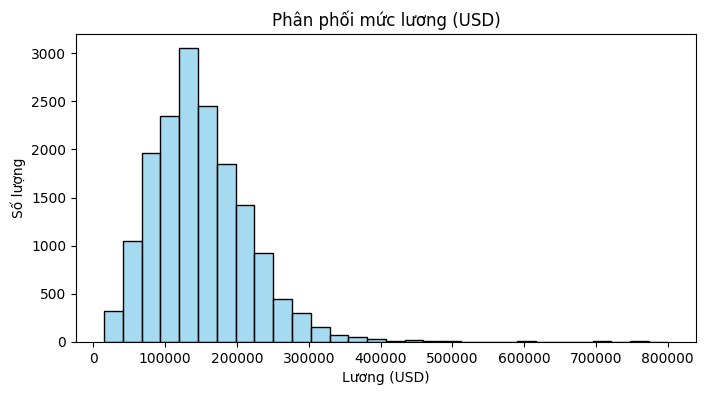

Lương trung bình: 149713.58
Lương trung vị: 141300.0
Lương thấp nhất: 15000
Lương cao nhất: 800000


In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Lương (USD)')
plt.ylabel('Số lượng')
plt.title('Phân phối mức lương (USD)')
plt.show()

# Ý nhỏ: Thống kê cơ bản
print('Lương trung bình:', round(df['salary_in_usd'].mean(), 2))
print('Lương trung vị:', df['salary_in_usd'].median())
print('Lương thấp nhất:', df['salary_in_usd'].min())
print('Lương cao nhất:', df['salary_in_usd'].max())

**Nhận xét**
- Histogram cho thấy mức lương ngành ML phân bố lệch phải (skewed right), tức là phần lớn người lao động nhận lương ở mức trung bình và thấp, chỉ một số ít nhận lương rất cao.
- Thống kê cơ bản: Lương trung bình cao hơn lương trung vị (median), chứng tỏ có nhiều giá trị ngoại lai cao kéo trung bình lên.
- Sự chênh lệch lương lớn, phản ánh sự đa dạng về vị trí, kinh nghiệm, quốc gia và quy mô công ty trong ngành ML.


## 2. Lương theo từng năm (work_year) và xu hướng lương qua các năm

C:\Users\Carlo\AppData\Local\Temp\ipykernel_37284\864941939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='work_year', y='salary_in_usd', palette='Blues')


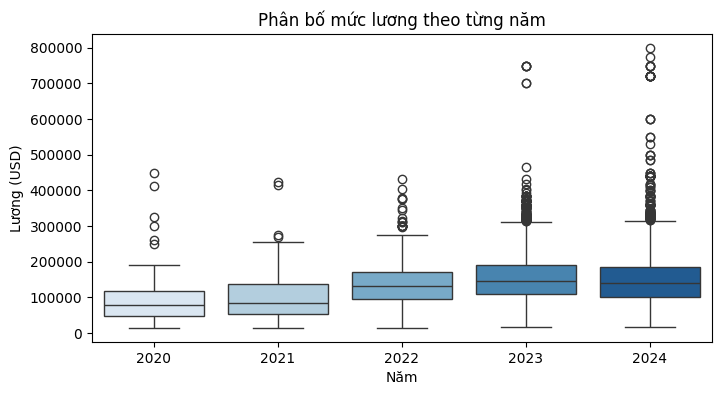

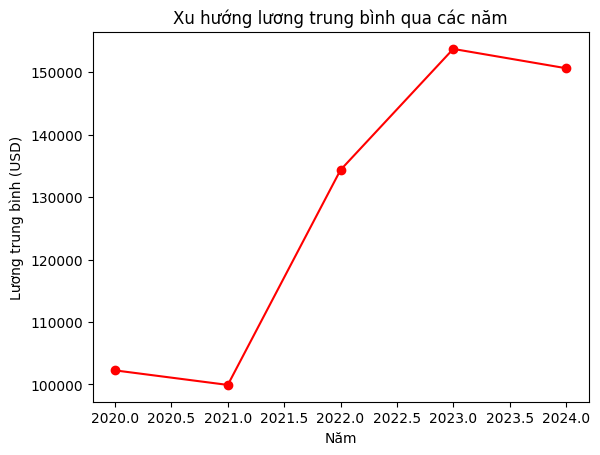

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='work_year', y='salary_in_usd', palette='Blues')
plt.title('Phân bố mức lương theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Lương (USD)')
plt.show()

# Ý nhỏ: Vẽ thêm xu hướng lương trung bình qua các năm
mean_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()
mean_salary_by_year.plot(marker='o', color='red')
plt.title('Xu hướng lương trung bình qua các năm')
plt.xlabel('Năm')
plt.ylabel('Lương trung bình (USD)')
plt.show()

**Nhận xét:**
- Boxplot: Từ 2020 đến 2023, median lương tăng rõ rệt, cho thấy mặt bằng lương chung tăng lên. Tuy nhiên, từ 2023 sang 2024, median lại giảm nhẹ, đồng thời boxplot năm 2024 có nhiều điểm ngoại lai cao hơn, tức là xuất hiện nhiều trường hợp lương rất cao.
- Biểu đồ đường (mean): Lương trung bình có xu hướng tăng từ 2020 đến 2023, nhưng lại giảm nhẹ ở 2023 và 2024. Điều này có thể do số lượng người lương thấp tăng lên hoặc sự xuất hiện của nhiều mức lương thấp hơn kéo trung bình xuống, dù vẫn có nhiều ngoại lai cao.
- So sánh: Boxplot cho thấy median (trung vị) và mean (trung bình) không hoàn toàn đồng nhất, đặc biệt ở 2024: median thấp nhưng có nhiều ngoại lai cao, chứng tỏ lương cao chỉ tập trung ở một số ít cá nhân.
- Tổng kết: Lương ngành ML tăng mạnh giai đoạn đầu, nhưng gần đây có dấu hiệu chững lại hoặc phân hóa mạnh hơn giữa các nhóm.

## 3. Lương theo cấp độ kinh nghiệm (experience_level) và phân bố lương trong từng nhóm

C:\Users\Carlo\AppData\Local\Temp\ipykernel_37284\364715107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2', order=exp_order)


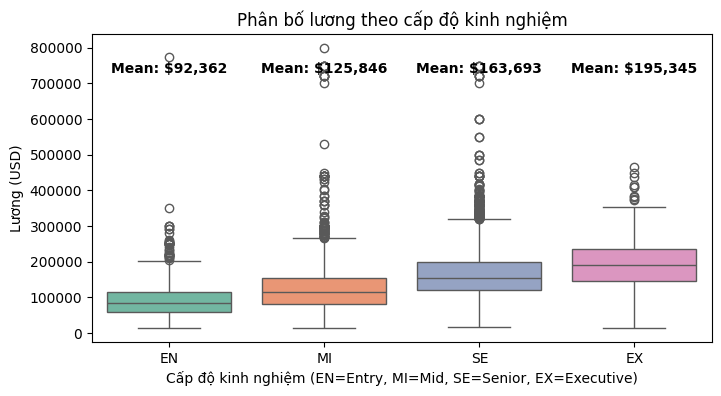

Số lượng từng nhóm kinh nghiệm:
experience_level
EN     1319
MI     4024
SE    10652
EX      499
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8,4))

# Define the correct order
exp_order = ['EN', 'MI', 'SE', 'EX']

# Create boxplot with ordered categories
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2', order=exp_order)

# Add more descriptive labels
plt.title('Phân bố lương theo cấp độ kinh nghiệm')
plt.xlabel('Cấp độ kinh nghiệm (EN=Entry, MI=Mid, SE=Senior, EX=Executive)')
plt.ylabel('Lương (USD)')

# Add mean values as text
for i, level in enumerate(exp_order):
    mean_salary = df[df['experience_level']==level]['salary_in_usd'].mean()
    plt.text(i, df['salary_in_usd'].max()*0.95, f'Mean: ${int(mean_salary):,}',
             ha='center', va='top', fontweight='bold')

plt.show()

# Ý nhỏ: So sánh số lượng từng nhóm kinh nghiệm
print('Số lượng từng nhóm kinh nghiệm:')
print(df['experience_level'].value_counts().reindex(exp_order))

**Nhận xét:**
- Boxplot: Lương tăng dần từ Entry (EN) → Mid (MI) → Senior (SE) → Executive (EX). Nhóm Executive có mức lương cao, nhưng số mức lương rất cao thì không có mà chỉ có ở 3 mức trên.
- Số lượng nhóm: Mid và Senior chiếm đa số, Executive rất ít, Entry cũng không nhiều.
- Tổng kết: Kinh nghiệm là yếu tố then chốt quyết định lương. Tuy nhiên, để đạt mức lương rất cao (Executive) là không dễ, chỉ dành cho số ít.

## 4. Lương theo loại hình làm việc từ xa (remote_ratio) và phân tích sâu nhóm Fully Remote

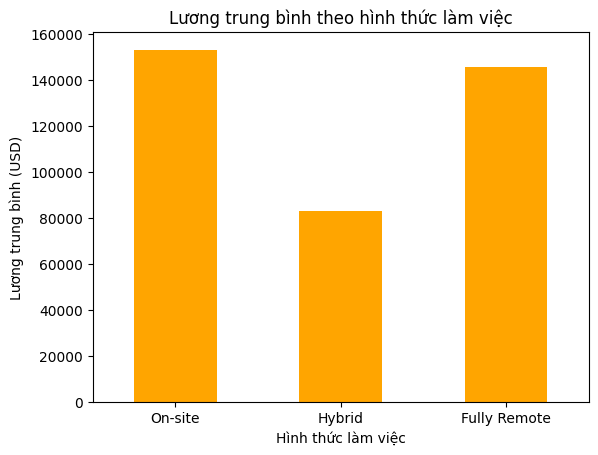

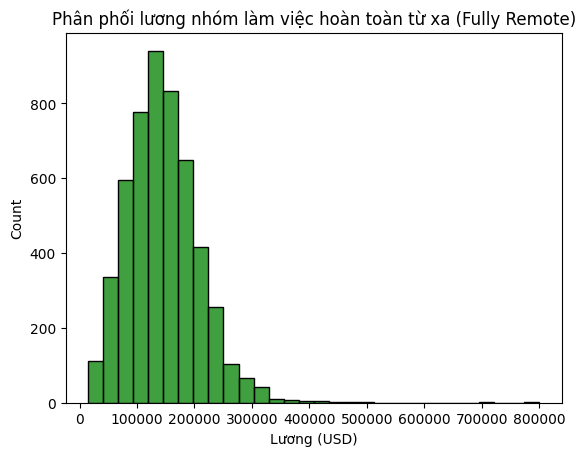

In [ ]:
mean_salary_remote = df.groupby('remote_ratio')['salary_in_usd'].mean()

# Mapping remote_ratio values to descriptive labels
remote_labels = {0: 'On-site', 50: 'Hybrid', 100: 'Fully Remote'}
mean_salary_remote.index = mean_salary_remote.index.map(remote_labels)

mean_salary_remote.plot(kind='bar', color='orange')
plt.title('Lương trung bình theo hình thức làm việc')
plt.xlabel('Hình thức làm việc')
plt.ylabel('Lương trung bình (USD)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

# Ý nhỏ: Phân bố lương của nhóm remote 100% (fully remote)
sns.histplot(df[df['remote_ratio']==100]['salary_in_usd'], bins=30, color='green')
plt.title('Phân phối lương nhóm làm việc hoàn toàn từ xa (Fully Remote)')
plt.xlabel('Lương (USD)')
plt.show()

**Nhận xét:**
- Bar chart: Lương trung bình cao nhất ở nhóm On-site , thấp nhất ở nhóm Hybrid và nhóm Fully Remote ở giữa.
- Histogram nhóm remote 100%: Phân bố rộng, nhiều người đạt mức lương cao, nhưng cũng có một số mức lương thấp.
- Tổng kết: Làm việc hoàn toàn từ xa giúp tiếp cận các công việc lương cao toàn cầu, nhưng cũng có sự phân hóa lớn về lương trong nhóm này.


## 5. Lương theo quy mô công ty (company_size) và phân tích thêm nhóm công ty lớn

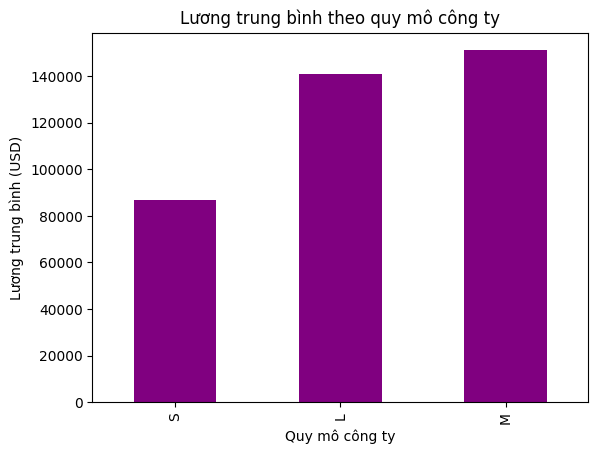

C:\Users\Carlo\AppData\Local\Temp\ipykernel_37284\4042124487.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='company_size', y='salary_in_usd', palette='pastel', order=['S', 'M', 'L'])


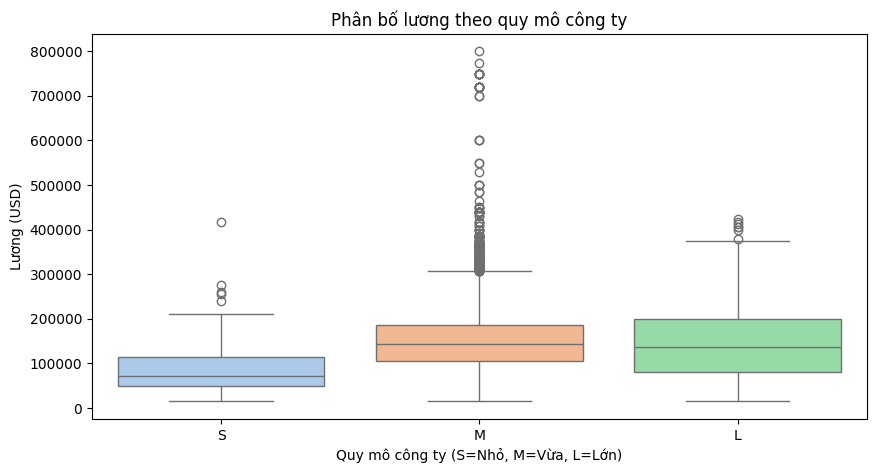

In [ ]:
mean_salary_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values()
mean_salary_size.plot(kind='bar', color='purple')
plt.title('Lương trung bình theo quy mô công ty')
plt.xlabel('Quy mô công ty')
plt.ylabel('Lương trung bình (USD)')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', palette='pastel', order=['S', 'M', 'L'])
plt.title('Phân bố lương theo quy mô công ty')
plt.xlabel('Quy mô công ty (S=Nhỏ, M=Vừa, L=Lớn)')
plt.ylabel('Lương (USD)')
plt.show()

**Nhận xét:**
- Bar chart: Công ty trung bình (M) trả lương trung bình cao nhất, tiếp theo là công ty lớn (L) và nhỏ (S) là thấp nhất.
- Boxplot nhóm L: Lương trong công ty lớn phân bố rộng, có nhiều mức lương rất cao (outlier), nhưng cũng có mức lương thấp.
- Tổng kết: Làm ở công ty lớn có cơ hội nhận lương cao, nhưng không phải ai cũng được trả cao – sự cạnh tranh và phân hóa trong nội bộ công ty lớn cũng lớn.

## 6. Top 10 chức danh công việc có lương trung bình cao nhất và phân tích thêm nhóm Data Scientist

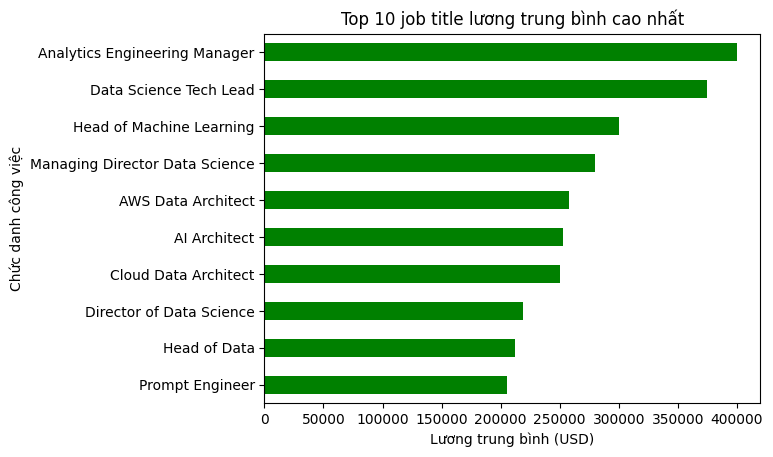

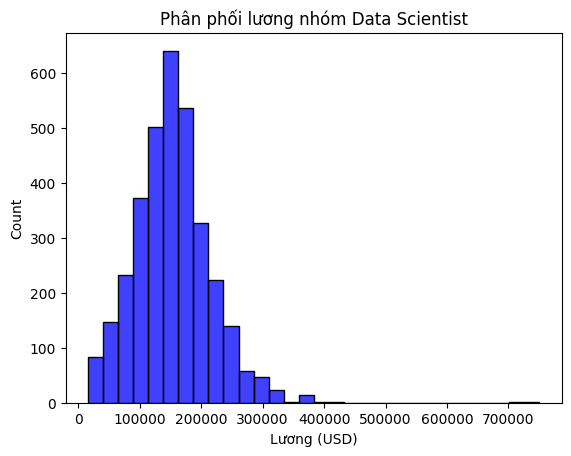

In [ ]:
top10_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top10_jobs.plot(kind='barh', color='green')
plt.title('Top 10 job title lương trung bình cao nhất')
plt.xlabel('Lương trung bình (USD)')
plt.ylabel('Chức danh công việc')
plt.gca().invert_yaxis()
plt.show()

# Vẽ phân phối lương cho nhóm Data Scientist
sns.histplot(df[df['job_title'].str.contains('Data Scientist', case=False)]['salary_in_usd'], bins=30, color='blue')
plt.title('Phân phối lương nhóm Data Scientist')
plt.xlabel('Lương (USD)')
plt.show()

**Nhận xét:**
- Barh chart: Các vị trí quản lý, kỹ sư cao cấp, kiến trúc sư dữ liệu thường có lương cao nhất. Data Scientist không nằm trong top nhưng cũng có mức lương khá cao.
- Histogram Data Scientist: Lương phân bố rộng, nhiều người ở mức trung bình, một số ít đạt mức rất cao.
- Tổng kết: Chức danh công việc ảnh hưởng lớn đến lương. Các vị trí chuyên môn sâu hoặc quản lý thường lương cao, nhưng ngay cả trong cùng một chức danh cũng có sự phân hóa lớn.

## 7. Lương theo quốc gia cư trú (employee_residence) - Top 10 quốc gia và so sánh lương nội địa vs quốc tế

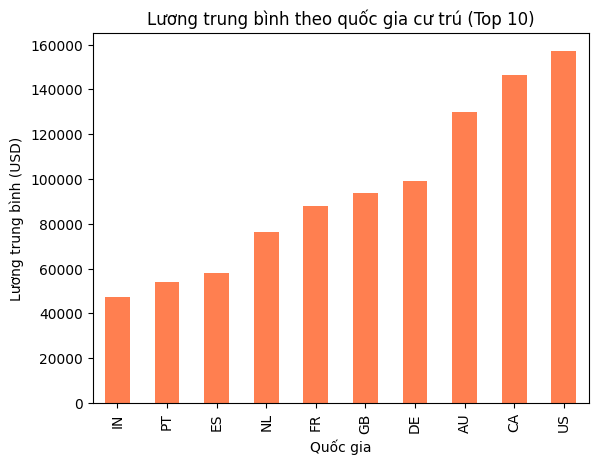

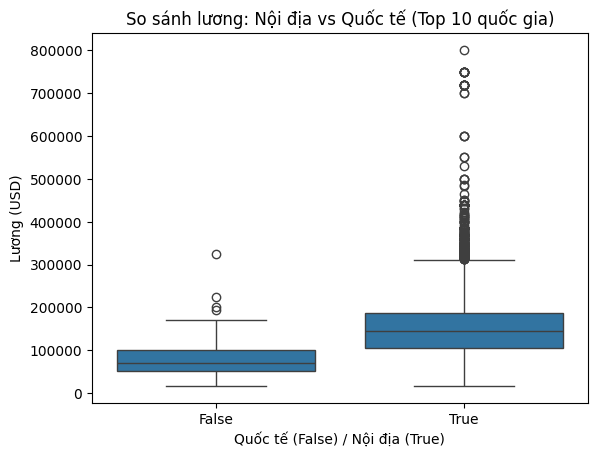

is_domestic
True     16364
False      130
Name: count, dtype: int64


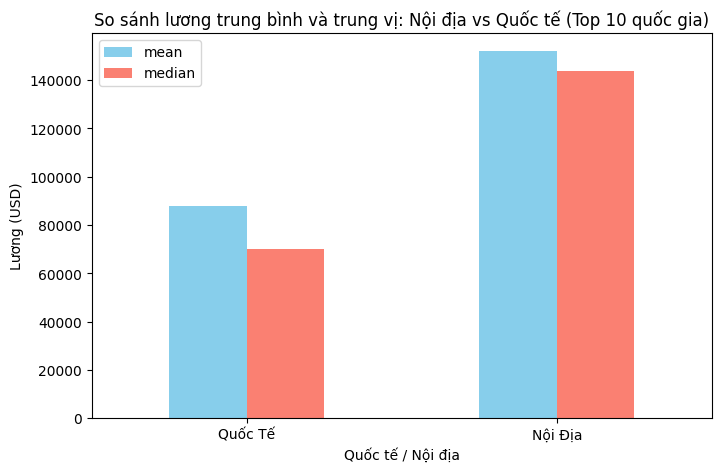

In [ ]:
top10_countries = df['employee_residence'].value_counts().head(10).index
mean_salary_country = df[df['employee_residence'].isin(top10_countries)].groupby('employee_residence')['salary_in_usd'].mean().sort_values()
mean_salary_country.plot(kind='bar', color='coral')
plt.title('Lương trung bình theo quốc gia cư trú (Top 10)')
plt.xlabel('Quốc gia')
plt.ylabel('Lương trung bình (USD)')
plt.show()

# Ý nhỏ: So sánh lương nhân viên làm việc tại quốc gia trùng với công ty vs khác quốc gia (nội địa vs quốc tế)
df['is_domestic'] = (df['employee_residence'] == df['company_location'])
sns.boxplot(data=df[df['employee_residence'].isin(top10_countries)], x='is_domestic', y='salary_in_usd')
plt.title('So sánh lương: Nội địa vs Quốc tế (Top 10 quốc gia)')
plt.xlabel('Quốc tế (False) / Nội địa (True)')
plt.ylabel('Lương (USD)')
plt.show()
print(df['is_domestic'].value_counts())

# Tính trung bình và trung vị cho từng nhóm
salary_stats = df[df['employee_residence'].isin(top10_countries)].groupby('is_domestic')['salary_in_usd'].agg(['mean', 'median'])

salary_stats.plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'], )
plt.title('So sánh lương trung bình và trung vị: Nội địa vs Quốc tế (Top 10 quốc gia)')
plt.xlabel('Quốc tế / Nội địa')
plt.ylabel('Lương (USD)')
plt.xticks([0,1], ['Quốc Tế', 'Nội Địa'], rotation=0)
plt.show()

In [ ]:
# Đếm số lượng nội địa (is_domestic=True) theo quốc gia trong top 10
domestic_counts = df[(df['employee_residence'].isin(top10_countries)) & (df['is_domestic'] == True)]
top5_domestic_countries = domestic_counts['employee_residence'].value_counts().head(5)
print("Top 5 quốc gia có số lượng nội địa cao nhất (trong top 10):")
print(top5_domestic_countries)

Top 5 quốc gia có số lượng nội địa cao nhất (trong top 10):
employee_residence
US    14421
GB      685
CA      449
ES      131
DE       93
Name: count, dtype: int64


**Nhận xét:**
- Từ biểu đồ cho thấy nhóm “nội địa” có phân phối lương nhỉnh hơn nhóm “quốc tế”, nhưng lý do chính nằm ở việc hầu hết quan sát thuộc về Mỹ (US): trong Top 10, Mỹ chiếm tới 14.421/16.494 mẫu nội địa.

- Khi cộng dồn, lượng dữ liệu khổng lồ từ Mỹ – vốn có mức lương ML tương đối cao – kéo mức trung bình và trung vị của “nội địa” lên đáng kể.

- Nhóm “quốc tế” quá nhỏ (chỉ 130 quan sát) nên các giá trị lương cao lẻ tẻ cũng không ảnh hưởng nhiều đến tổng thể, dẫn đến sự chênh lệch rõ rệt so với nhóm nội địa.

- Tổng kết: Quốc gia là yếu tố quan trọng quyết định lương. Làm việc cho công ty trong nước hoặc ở các quốc gia phát triển giúp tăng cơ hội nhận lương cao nhưng do đặc thù bộ dữ liệu hầu hết là người ở Mỹ nên đã tạo ra sự khác biệt này.

## Kết luận
- Lương ngành ML chịu ảnh hưởng mạnh bởi năm, kinh nghiệm, remote, quy mô công ty, chức danh và quốc gia.
- Có sự phân hóa rất lớn trong từng nhóm, đặc biệt ở các năm gần đây và các nhóm remote/công ty lớn.
- Các biểu đồ giúp nhận diện rõ các xu hướng, ngoại lệ và sự đa dạng của thị trường lao động ML hiện nay.

# III. Hồi quy

Kết quả đánh giá trên tập test:
              Model           MSE        R2     alpha
0  LinearRegression  3.317357e+08  0.931820       NaN
1           RidgeCV  4.397685e+08  0.909616  0.000001
2           LassoCV  4.755486e+09  0.022624  0.000001


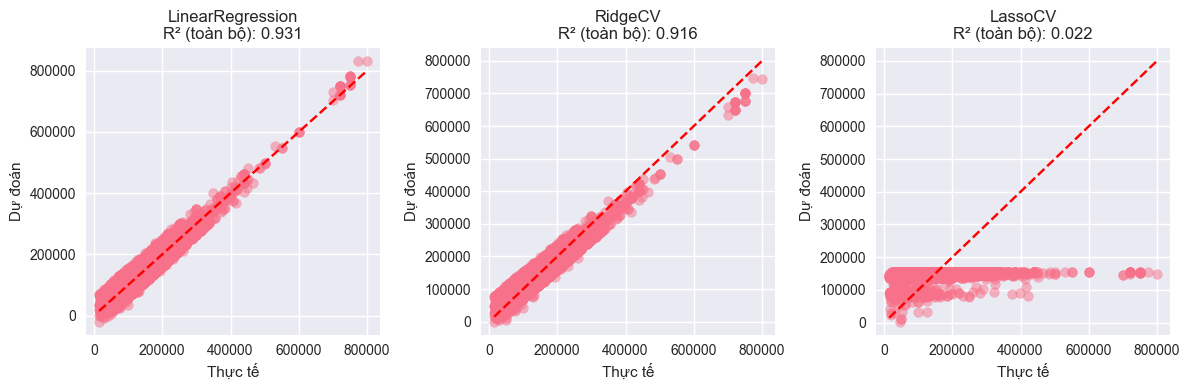

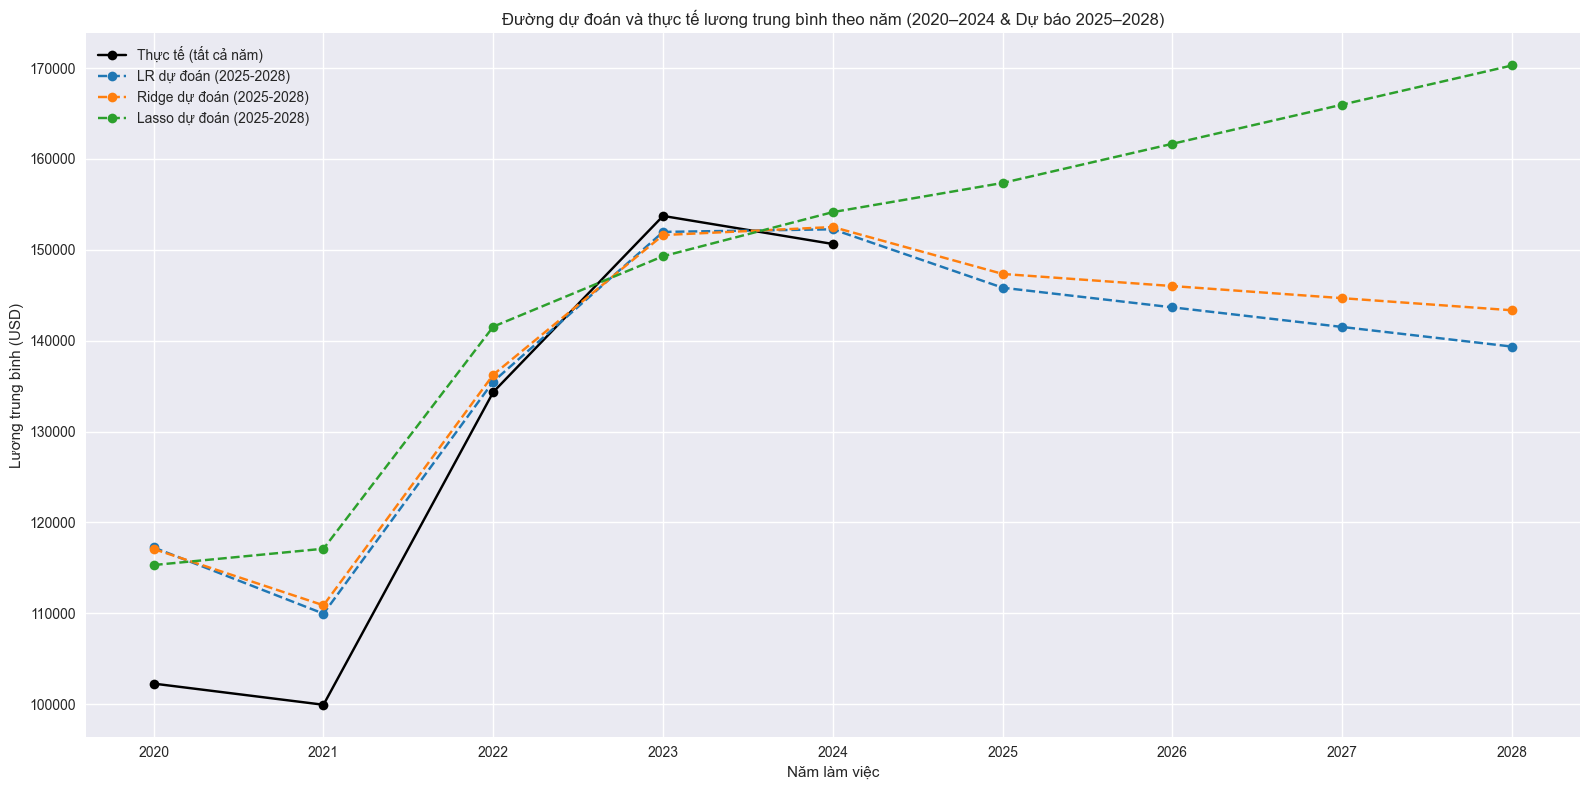

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# 1. Đọc dữ liệu (đảm bảo file nằm ở /mnt/data/)
df = pd.read_csv("data/salaries_ml_tasks.csv")

# 2. Tạo thêm cột "year_since_base" để đưa vào mô hình
base_year = df["work_year"].min()
df["year_since_base"] = df["work_year"] - base_year

# 3. Chọn features và target
features = [
    "year_since_base",
    "PC1",
    "employment_type_CT",
    "employment_type_FL",
    "employment_type_FT",
    "employment_type_PT",
    "remote_type__Fully",
    "remote_type__Hybrid",
    "remote_type__On-site"
]
target = "salary_in_usd"

X = df[features].copy()
y = df[target].copy()

# 4. Chia train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Khởi tạo scaler và các mô hình
scaler = StandardScaler()
ridge_alphas = np.logspace(-6, 2, 50)
lasso_alphas = np.logspace(-6, 2, 50)

models = {
    "LinearRegression": LinearRegression(),
    "RidgeCV": RidgeCV(alphas=ridge_alphas, cv=3),
    "LassoCV": LassoCV(alphas=lasso_alphas, cv=3, max_iter=10000, tol=1e-3)
}

# 6. Huấn luyện từng mô hình, dự đoán trên tập test, tính MSE & R2
results = []
for name, model in models.items():
    pipe = Pipeline([
        ("scaler", scaler),
        ("regressor", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred_test = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    row = {"Model": name, "MSE": mse, "R2": r2}
    if name in ["RidgeCV", "LassoCV"]:
        row["alpha"] = pipe.named_steps["regressor"].alpha_
    results.append(row)

results_df = pd.DataFrame(results).sort_values("R2", ascending=False).reset_index(drop=True)
print("Kết quả đánh giá trên tập test:")
print(results_df)

# 7. Vẽ scatter plot: Thực tế vs Dự đoán trên toàn bộ tập data cho mỗi mô hình
plt.figure(figsize=(12, 4))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, len(models), i + 1)
    # Fit lại trên toàn bộ X, y
    pipe_all = Pipeline([("scaler", scaler), ("regressor", model)])
    pipe_all.fit(X, y)
    y_all_pred = pipe_all.predict(X)
    plt.scatter(y, y_all_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    r2_all = r2_score(y, y_all_pred)
    plt.title(f"{name}\nR² (toàn bộ): {r2_all:.3f}")
    plt.xlabel("Thực tế")
    plt.ylabel("Dự đoán")
    plt.tight_layout()
plt.show()

# 8. Fit lại mô hình trên toàn bộ dữ liệu để dự đoán lại quá khứ và dự báo tương lai
pipe_LR = Pipeline([("scaler", scaler), ("regressor", LinearRegression())])
pipe_Ridge = Pipeline([("scaler", scaler), ("regressor", RidgeCV(alphas=ridge_alphas, cv=3))])
pipe_Lasso = Pipeline([("scaler", scaler), ("regressor", LassoCV(alphas=lasso_alphas, cv=3, max_iter=10000, tol=1e-3))])

pipe_LR.fit(X, y)
pipe_Ridge.fit(X, y)
pipe_Lasso.fit(X, y)

# 9. Dự đoán lại từng hàng quá khứ (trên toàn bộ dữ liệu)
df["pred_LR"]    = pipe_LR.predict(X)
df["pred_Ridge"] = pipe_Ridge.predict(X)
df["pred_Lasso"] = pipe_Lasso.predict(X)

# 10. Tính trung bình từng năm cho thực tế và các mô hình
df_year = df.groupby("year_since_base").agg({
    "salary_in_usd": "mean",
    "pred_LR": "mean",
    "pred_Ridge": "mean",
    "pred_Lasso": "mean"
}).reset_index()
df_year["work_year"] = df_year["year_since_base"] + base_year

# 11. Tạo dự báo tương lai (2025–2028)
years_future_abs = [2025, 2026, 2027, 2028]
years_future = [y - base_year for y in years_future_abs]

# Lấy giá trị trung bình của các biến categorical & PC1
ct_rate     = df["employment_type_CT"].mean()
fl_rate     = df["employment_type_FL"].mean()
ft_rate     = df["employment_type_FT"].mean()
pt_rate     = df["employment_type_PT"].mean()
full_rate   = df["remote_type__Fully"].mean()
hyb_rate    = df["remote_type__Hybrid"].mean()
onsite_rate = df["remote_type__On-site"].mean()
pc1_mean    = df["PC1"].mean()

future_data = pd.DataFrame({
    "year_since_base": years_future,
    "PC1": [pc1_mean] * len(years_future),
    "employment_type_CT": [ct_rate] * len(years_future),
    "employment_type_FL": [fl_rate] * len(years_future),
    "employment_type_FT": [ft_rate] * len(years_future),
    "employment_type_PT": [pt_rate] * len(years_future),
    "remote_type__Fully": [full_rate] * len(years_future),
    "remote_type__Hybrid": [hyb_rate] * len(years_future),
    "remote_type__On-site": [onsite_rate] * len(years_future)
})

future_preds = {
    "LR":     pipe_LR.predict(future_data[features]),
    "Ridge":  pipe_Ridge.predict(future_data[features]),
    "Lasso":  pipe_Lasso.predict(future_data[features])
}
df_future = pd.DataFrame({
    "work_year": years_future_abs,
    "pred_LR":    future_preds["LR"],
    "pred_Ridge": future_preds["Ridge"],
    "pred_Lasso": future_preds["Lasso"]
})

# 12. Đường thực tế trung bình cho tất cả các năm
df_actual_all_years = df.groupby("work_year")["salary_in_usd"].mean().reset_index()

# 13. Ghép dự đoán quá khứ và tương lai để vẽ nối liền
df_pred_LR = pd.concat([df_year[["work_year", "pred_LR"]], df_future[["work_year", "pred_LR"]]], ignore_index=True)
df_pred_Ridge = pd.concat([df_year[["work_year", "pred_Ridge"]], df_future[["work_year", "pred_Ridge"]]], ignore_index=True)
df_pred_Lasso = pd.concat([df_year[["work_year", "pred_Lasso"]], df_future[["work_year", "pred_Lasso"]]], ignore_index=True)

# 14. Vẽ kết quả tổng hợp
plt.figure(figsize=(16, 8))
plt.plot(
    df_actual_all_years["work_year"],
    df_actual_all_years["salary_in_usd"],
    color="black", marker="o", linestyle="-", label="Thực tế (tất cả năm)"
)
plt.plot(
    df_pred_LR["work_year"],
    df_pred_LR["pred_LR"],
    marker="o", linestyle="--", color="tab:blue", label="LR dự đoán (2025-2028)"
)
plt.plot(
    df_pred_Ridge["work_year"],
    df_pred_Ridge["pred_Ridge"],
    marker="o", linestyle="--", color="tab:orange", label="Ridge dự đoán (2025-2028)"
)
plt.plot(
    df_pred_Lasso["work_year"],
    df_pred_Lasso["pred_Lasso"],
    marker="o", linestyle="--", color="tab:green", label="Lasso dự đoán (2025-2028)"
)
plt.title("Đường dự đoán và thực tế lương trung bình theo năm (2020–2024 & Dự báo 2025–2028)")
plt.xlabel("Năm làm việc")
plt.ylabel("Lương trung bình (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# IV. Phân lớp

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, f1_score)
import warnings
warnings.filterwarnings('ignore')
# Thiết lập style cho matplotlib
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
# 1. Đọc dữ liệu
print("\n1. ĐỌC DỮ LIỆU...")
print("-" * 40)

try:
    # Đọc dữ liệu
    data = pd.read_csv('salaries.csv')
    print(f"Dữ liệu đã load lên thành công!")
    print(f"Kích thước: {data.shape}")
    print("-" * 40)
    # Thể hiện các thông tin cơ bản về dataset
    print(f"\nCột của bộ dữ liệu:")
    print(data.columns.tolist())
    print("-" * 40)
    print(f"\nKiểu dữ liệu:")
    print(data.dtypes)
    print("-" * 40)
    print(f"\n5 dòng đầu:")
    print(data.head())

except FileNotFoundError:
    print("File 'salaries_ml_tasks.csv' not found!")
    print("Please make sure the file is in the current directory.")
    exit()



1. ĐỌC DỮ LIỆU...
----------------------------------------
Dữ liệu đã load lên thành công!
Kích thước: (16494, 11)
----------------------------------------

Cột của bộ dữ liệu:
['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
----------------------------------------

Kiểu dữ liệu:
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
----------------------------------------

5 dòng đầu:
   work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT        Data Scientist  120000   
1       2024               MI      

In [ ]:
# 2. Tiền xử lý dữ liệu
print("\n2. TIỀN XỬ LÝ...")
print("-" * 40)

# Kiểm tra dữ liệu bị mất
print(f"Dữ liệu bị mất:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.any() else "Không có dữ liệu bị mất.")
print("-" * 40)

# Sinh cột phân loại lương (salary_category) dựa trên salary_in_usd
# Ví dụ: Low < 80k, Medium 80k-150k, High > 150k (bạn có thể điều chỉnh lại ngưỡng nếu muốn)
bins = [0, 80000, 150000, data['salary_in_usd'].max()+1]
labels = ['Low', 'Medium', 'High']
data['salary_category'] = pd.cut(data['salary_in_usd'], bins=bins, labels=labels, right=False)

print("Phân phối salary_category:")
print(data['salary_category'].value_counts())
print("-" * 40)

# Tạo bản sao để xử lý
data_processed = data.copy()

# Xử lý categorical variables
target_col = 'salary_category'
categorical_cols = data_processed.select_dtypes(include=['object']).columns.tolist()
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print(f"\nCột Categorical mã hóa: {categorical_cols}")
print("-" * 40)
# Mã hóa nhãn categorical variables
if categorical_cols:
    le = LabelEncoder()
    for col in categorical_cols:
        print(f"Đang mã hóa {col}...")
        data_processed[col] = le.fit_transform(data_processed[col].astype(str))
print("-" * 40)

# Chọn features (loại bỏ target và các cột không cần thiết)
exclude_cols = [target_col, 'work_year', 'salary_in_usd', 'salary', 'salary_currency']  # Loại bỏ để tránh data leakage
feature_cols = [col for col in data_processed.columns if col not in exclude_cols]

print(f"\nSelected features ({len(feature_cols)}):")
print(feature_cols)
print("-" * 40)

# Chuẩn bị features and target
X = data_processed[feature_cols]
y = data_processed[target_col]

# Đảm bảo tất cả features là numeric
print(f"\nFeature data types after processing:")
print(X.dtypes)
print("-" * 40)
# Chuyển target to categorical
y = y.astype('category')
print(f"\nTarget classes: {y.cat.categories.tolist()}")


2. TIỀN XỬ LÝ...
----------------------------------------
Dữ liệu bị mất:
Không có dữ liệu bị mất.
----------------------------------------
Phân phối salary_category:
salary_category
High      7489
Medium    6799
Low       2206
Name: count, dtype: int64
----------------------------------------

Cột Categorical mã hóa: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
----------------------------------------
Đang mã hóa experience_level...
Đang mã hóa employment_type...
Đang mã hóa job_title...
Đang mã hóa salary_currency...
Đang mã hóa employee_residence...
Đang mã hóa company_location...
Đang mã hóa company_size...
----------------------------------------

Selected features (7):
['experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
----------------------------------------

Feature data types after processing:
experience_level      in

In [ ]:
# 3. PHÂN CHIA TẬP TRAIN-TEST
print("\n3. PHÂN CHIA TẬP TRAIN-TEST...")
print("-" * 40)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} mẫu")
print(f"Test set: {X_test.shape[0]} mẫu")
print("-" * 40)
# Chuẩn hóa các tính năng cho Hồi quy Logistic (Logistic Regression)
print("\nĐang chuẩn hóa các tính năng...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Chuẩn hóa các tính năng hoàn tất.")


3. PHÂN CHIA TẬP TRAIN-TEST...
----------------------------------------
Training set: 13195 mẫu
Test set: 3299 mẫu
----------------------------------------

Đang chuẩn hóa các tính năng...
Chuẩn hóa các tính năng hoàn tất.


In [ ]:
# 4. XÂY DỰNG MÔ HÌNH
print("\n4. XÂY DỰNG MÔ HÌNH...")
print("-" * 40)

# Lưu trữ kết quả để so sánh
results = {}

# 4.1 LOGISTIC REGRESSION
print("\n4.1 LOGISTIC REGRESSION")
print("." * 30)

# Basic Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Dự đoán
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Đánh giá
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='weighted')

print(f"Logistic Regression Results:")
print(f"  Accuracy: {log_reg_accuracy:.4f}")
print(f"  F1-Score: {log_reg_f1:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Lưu kết quả
results['Logistic Regression'] = {
    'accuracy': log_reg_accuracy,
    'f1_score': log_reg_f1,
    'predictions': y_pred_log_reg,
    'model': log_reg
}

# 4.2 DECISION TREE
print("\n4.2 DECISION TREE")
print("." * 30)

# Basic Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Dự đoán
y_pred_tree = decision_tree.predict(X_test)

# Đánh giá
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree, average='weighted')

print(f"Decision Tree Results:")
print(f"  Accuracy: {tree_accuracy:.4f}")
print(f"  F1-Score: {tree_f1:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

# Lưu kết quả
results['Decision Tree'] = {
    'accuracy': tree_accuracy,
    'f1_score': tree_f1,
    'predictions': y_pred_tree,
    'model': decision_tree
}


4. XÂY DỰNG MÔ HÌNH...
----------------------------------------

4.1 LOGISTIC REGRESSION
..............................


Logistic Regression Results:
  Accuracy: 0.5590
  F1-Score: 0.5466

Classification Report:
              precision    recall  f1-score   support

        High       0.60      0.73      0.66      1498
         Low       0.55      0.29      0.38       441
      Medium       0.51      0.45      0.48      1360

    accuracy                           0.56      3299
   macro avg       0.55      0.49      0.51      3299
weighted avg       0.55      0.56      0.55      3299


4.2 DECISION TREE
..............................
Decision Tree Results:
  Accuracy: 0.6178
  F1-Score: 0.6047

Classification Report:
              precision    recall  f1-score   support

        High       0.64      0.82      0.72      1498
         Low       0.64      0.43      0.51       441
      Medium       0.58      0.46      0.51      1360

    accuracy                           0.62      3299
   macro avg       0.62      0.57      0.58      3299
weighted avg       0.61      0.62      0.60      3299



In [ ]:
# 5. ĐIỀU CHỈNH SIÊU THAM SỐ (HYPERPARAMETER TUNING)
print("\n5. ĐIỀU CHỈNH SIÊU THAM SỐ...")
print("-" * 40)

# 5.1 Logistic Regression Hyperparameter Tuning
print("\n5.1 Logistic Regression Hyperparameter Tuning")
print("." * 50)

param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000]
}

grid_log_reg = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_log_reg,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

print("Training Logistic Regression with GridSearchCV...")
grid_log_reg.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_log_reg.best_params_}")
print(f"Best CV score: {grid_log_reg.best_score_:.4f}")

# 5.2 Decision Tree Hyperparameter Tuning
print("\n5.2 Decision Tree Hyperparameter Tuning")
print("." * 50)

param_grid_tree = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_tree,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

print("Training Decision Tree with GridSearchCV...")
grid_tree.fit(X_train, y_train)

print(f"Best parameters: {grid_tree.best_params_}")
print(f"Best CV score: {grid_tree.best_score_:.4f}")


5. ĐIỀU CHỈNH SIÊU THAM SỐ...
----------------------------------------

5.1 Logistic Regression Hyperparameter Tuning
..................................................
Training Logistic Regression with GridSearchCV...
Best parameters: {'C': 1, 'max_iter': 1000, 'solver': 'liblinear'}
Best CV score: 0.5256

5.2 Decision Tree Hyperparameter Tuning
..................................................
Training Decision Tree with GridSearchCV...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.5956


In [ ]:
# 6. ĐÁNH GIÁ MÔ HÌNH CUỐI CÙNG
print("\n6. ĐÁNH GIÁ MÔ HÌNH CUỐI CÙNG...")
print("-" * 40)

# 6.1 Best Logistic Regression
print("\n6.1 Best Logistic Regression")
print("." * 30)

best_log_reg = grid_log_reg.best_estimator_
y_pred_best_log_reg = best_log_reg.predict(X_test_scaled)

best_log_reg_accuracy = accuracy_score(y_test, y_pred_best_log_reg)
best_log_reg_f1 = f1_score(y_test, y_pred_best_log_reg, average='weighted')

print(f"Best Logistic Regression Results:")
print(f"  Accuracy: {best_log_reg_accuracy:.4f}")
print(f"  F1-Score: {best_log_reg_f1:.4f}")

results['Best Logistic Regression'] = {
    'accuracy': best_log_reg_accuracy,
    'f1_score': best_log_reg_f1,
    'predictions': y_pred_best_log_reg,
    'model': best_log_reg
}

# 6.2 Best Decision Tree
print("\n6.2 Best Decision Tree")
print("." * 30)

best_decision_tree = grid_tree.best_estimator_
y_pred_best_tree = best_decision_tree.predict(X_test)

best_tree_accuracy = accuracy_score(y_test, y_pred_best_tree)
best_tree_f1 = f1_score(y_test, y_pred_best_tree, average='weighted')

print(f"Best Decision Tree Results:")
print(f"  Accuracy: {best_tree_accuracy:.4f}")
print(f"  F1-Score: {best_tree_f1:.4f}")

results['Best Decision Tree'] = {
    'accuracy': best_tree_accuracy,
    'f1_score': best_tree_f1,
    'predictions': y_pred_best_tree,
    'model': best_decision_tree
}


6. ĐÁNH GIÁ MÔ HÌNH CUỐI CÙNG...
----------------------------------------

6.1 Best Logistic Regression
..............................
Best Logistic Regression Results:
  Accuracy: 0.5559
  F1-Score: 0.5418

6.2 Best Decision Tree
..............................
Best Decision Tree Results:
  Accuracy: 0.6175
  F1-Score: 0.6056


In [ ]:
# 7. SO SÁNH KẾT QUẢ
print("\n7. SO SÁNH KẾT QUẢ...")
print("-" * 40)

# Tao bảng so sánh kết quả
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'F1-Score': [results[model]['f1_score'] for model in results.keys()]
})

print("\nModel Comparison Table:")
print("=" * 60)
for i, row in comparison_df.iterrows():
    print(f"{row['Model']:<25} | Accuracy: {row['Accuracy']:.4f} | F1-Score: {row['F1-Score']:.4f}")
print("-" * 40)
# Tìm kiếm mô hình tốt nhất dựa trên F1-Score
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
best_f1_score = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'F1-Score']
print(f"\n Best Model: {best_model_name}")
print(f"   F1-Score: {best_f1_score:.4f}")


7. SO SÁNH KẾT QUẢ...
----------------------------------------

Model Comparison Table:
Logistic Regression       | Accuracy: 0.5590 | F1-Score: 0.5466
Decision Tree             | Accuracy: 0.6178 | F1-Score: 0.6047
Best Logistic Regression  | Accuracy: 0.5559 | F1-Score: 0.5418
Best Decision Tree        | Accuracy: 0.6175 | F1-Score: 0.6056
----------------------------------------

 Best Model: Best Decision Tree
   F1-Score: 0.6056



8. ĐANG TẠO BIỂU ĐỒ TRỰC QUAN HÓA...
----------------------------------------


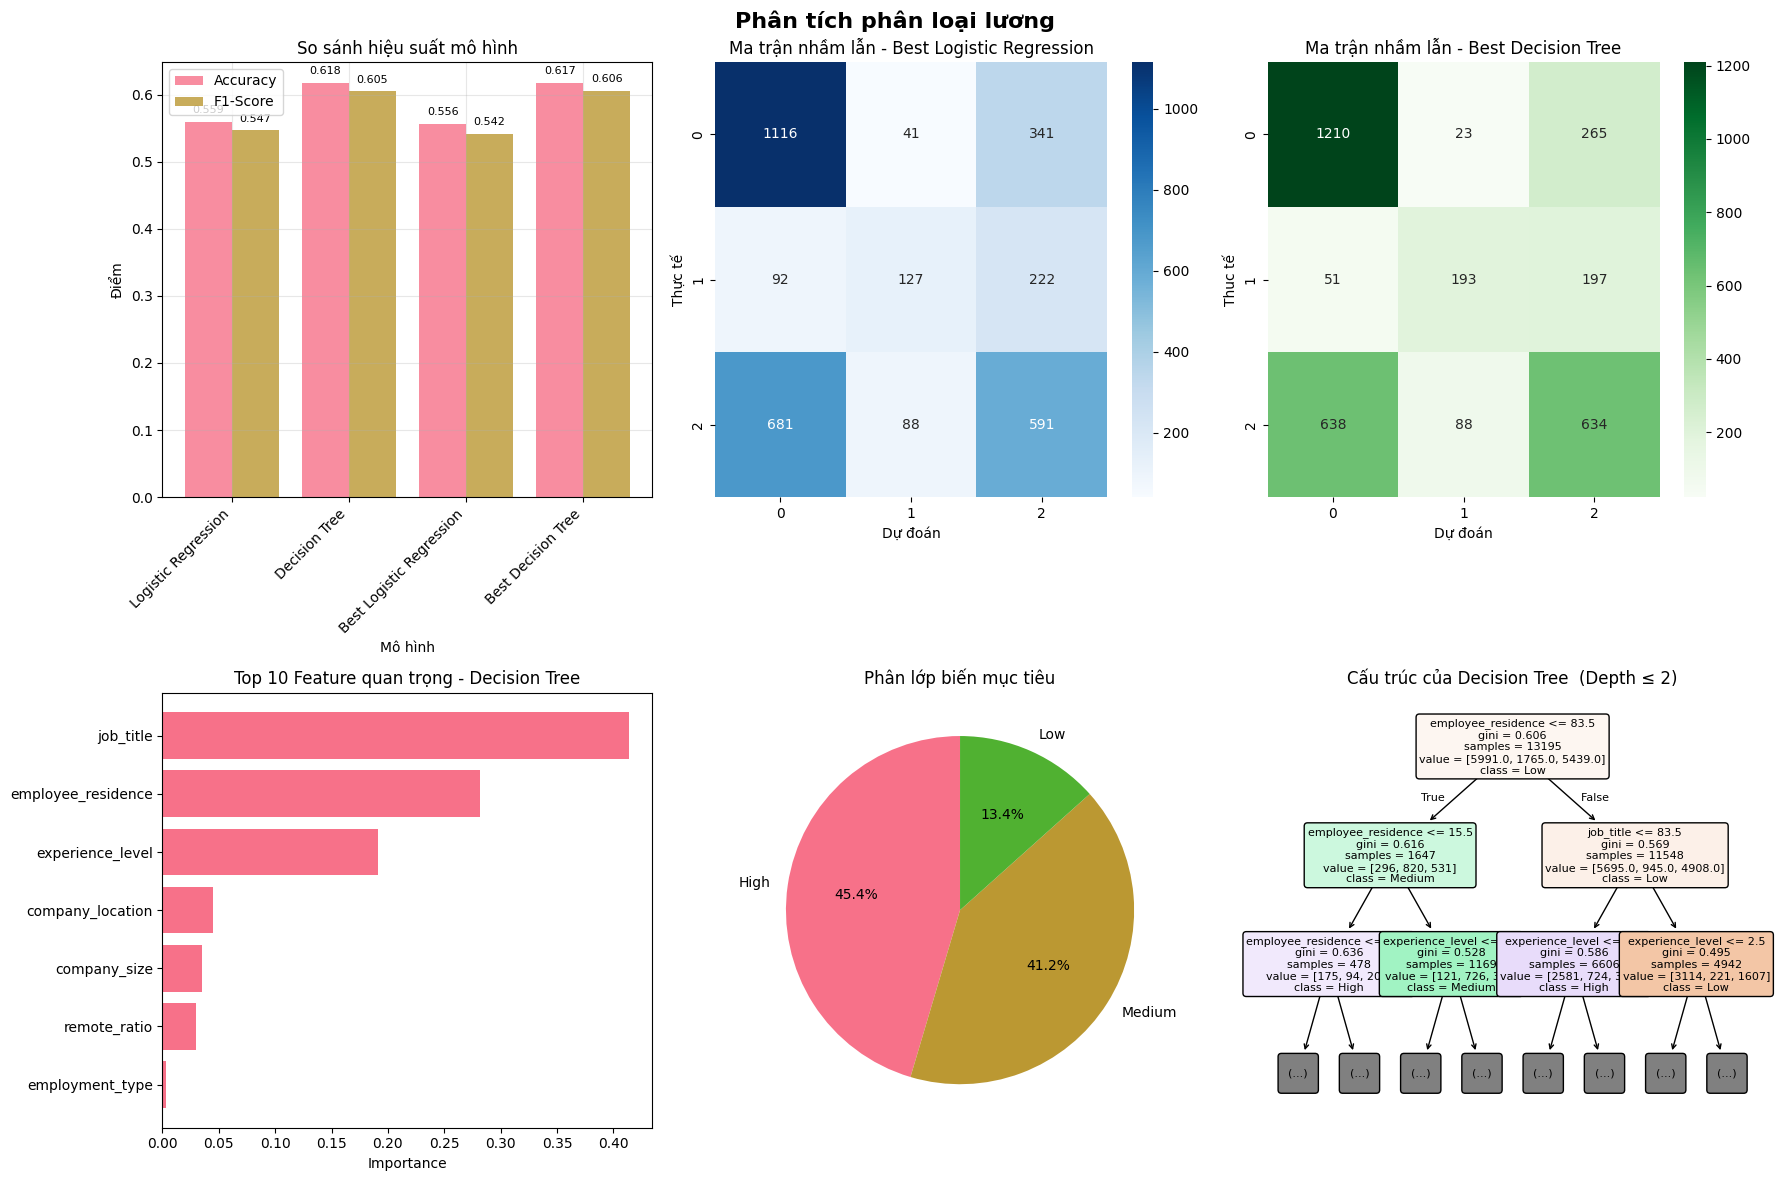

In [ ]:
# 8. TRỰC QUAN HÓA
print("\n8. ĐANG TẠO BIỂU ĐỒ TRỰC QUAN HÓA...")
print("-" * 40)

# Tạo mô hình bằng subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Phân tích phân loại lương', fontsize=16, fontweight='bold')

# 8.1 Mô hình so sánh Bar Chart
ax1 = axes[0, 0]
models = comparison_df['Model']
x_pos = np.arange(len(models))

bars1 = ax1.bar(x_pos - 0.2, comparison_df['Accuracy'], 0.4, label='Accuracy', alpha=0.8)
bars2 = ax1.bar(x_pos + 0.2, comparison_df['F1-Score'], 0.4, label='F1-Score', alpha=0.8)

ax1.set_xlabel('Mô hình')
ax1.set_ylabel('Điểm')
ax1.set_title('So sánh hiệu suất mô hình')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Thêm giá trị vào các bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 8.2 Ma trận nhầm lẫn - Best Logistic Regression
ax2 = axes[0, 1]
cm_log_reg = confusion_matrix(y_test, y_pred_best_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Ma trận nhầm lẫn - Best Logistic Regression')
ax2.set_xlabel('Dự đoán')
ax2.set_ylabel('Thực tế')

# 8.3 Ma trận nhầm lẫn - Best Decision Tree
ax3 = axes[0, 2]
cm_tree = confusion_matrix(y_test, y_pred_best_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', ax=ax3)
ax3.set_title('Ma trận nhầm lẫn - Best Decision Tree')
ax3.set_xlabel('Dự đoán')
ax3.set_ylabel('Thuc tế')

# 8.4 Tính năng quan trọng - Decision Tree
ax4 = axes[1, 0]
feature_importance = best_decision_tree.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=True)

# Show top 10 features
top_features = importance_df.tail(10)
ax4.barh(top_features['feature'], top_features['importance'])
ax4.set_title('Top 10 Feature quan trọng - Decision Tree')
ax4.set_xlabel('Importance')

# 8.5 Lớp phân loại - Target Variable Distribution
ax5 = axes[1, 1]
class_counts = y.value_counts()
ax5.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
ax5.set_title('Phân lớp biến mục tiêu')

# 8.6 Decision Tree Visualization (đơn giản hóa)
ax6 = axes[1, 2]
# Vẽ một phiên bản đơn giản của Decision Tree
try:
    plot_tree(best_decision_tree,
              feature_names=feature_names,
              class_names=y.cat.categories.astype(str),
              filled=True,
              rounded=True,
              max_depth=2,  # Limit depth for readability
              ax=ax6,
              fontsize=8)
    ax6.set_title('Cấu trúc của Decision Tree  (Depth ≤ 2)')
except:
    ax6.text(0.5, 0.5, 'Decision Tree\nVisualization\nNot Available',
             ha='center', va='center', transform=ax6.transAxes)
    ax6.set_title('Decision Tree Visualization')

plt.tight_layout()
plt.show()

In [ ]:
# 9. PHÂN TÍCH CHI TIẾT
print("\n9. PHÂN TÍCH CHI TIẾT...")
print("-" * 40)

print("\n9.1 Phân tích tầm quan trọng của features (Decision Tree)")
print("." * 50)
importance_df_sorted = importance_df.sort_values('importance', ascending=False)
print("Top 5 Features quan trọng:")
for i, (_, row) in enumerate(importance_df_sorted.head().iterrows(), 1):
    print(f"  {i}. {row['feature']}: {row['importance']:.4f}")

print("\n9.2 Phân tích lỗi")
print("." * 20)

# Phân tích ma trận nhầm lẫn cho best model
best_model_predictions = results[best_model_name]['predictions']
cm = confusion_matrix(y_test, best_model_predictions)
classes = y.cat.categories

print(f"Phân tích ma trận nhầm lẫn cho {best_model_name}:")

# Tính toán độ chính xác cho từng lớp
print("Per-class Performance:")
for i, class_name in enumerate(classes):
    if cm[i, :].sum() > 0:
        class_accuracy = cm[i, i] / cm[i, :].sum()
        print(f"  {class_name}: {class_accuracy:.4f}")

# Find most common misclassifications
print("\nMost Common Misclassifications:")
max_misclass = 0
max_misclass_pair = None

for i in range(len(classes)):
    for j in range(len(classes)):
        if i != j and cm[i, j] > max_misclass:
            max_misclass = cm[i, j]
            max_misclass_pair = (classes[i], classes[j])

if max_misclass_pair and max_misclass > 0:
    print(f"  Most confused: {max_misclass_pair[0]} → {max_misclass_pair[1]} ({max_misclass} cases)")
else:
    print("  No significant misclassifications found")



9. PHÂN TÍCH CHI TIẾT...
----------------------------------------

9.1 Phân tích tầm quan trọng của features (Decision Tree)
..................................................
Top 5 Features quan trọng:
  1. job_title: 0.4140
  2. employee_residence: 0.2820
  3. experience_level: 0.1911
  4. company_location: 0.0445
  5. company_size: 0.0350

9.2 Phân tích lỗi
....................
Phân tích ma trận nhầm lẫn cho Best Decision Tree:
Per-class Performance:
  Low: 0.8077
  Medium: 0.4376
  High: 0.4662

Most Common Misclassifications:
  Most confused: High → Low (638 cases)


In [ ]:
# 10. TÓM TẮT VÀ KẾT LUẬN
print("\n10. TÓM TẮT VÀ KẾT LUẬN")
print("=" * 50)

print(f"""
TÓM TẮT ĐỒ ÁN:
• Dataset: {data.shape[0]} mẫu, {len(feature_cols)} tính năng được sử dụng
• Target: {len(y.cat.categories)} salary categories ({', '.join(y.cat.categories)})
• Models tested: Logistic Regression, Decision Tree
• Best model: {best_model_name}

HIỆU SUẤT:
• Best Accuracy: {comparison_df['Accuracy'].max():.4f}
• Best F1-Score: {comparison_df['F1-Score'].max():.4f}

THÔNG TIN CHÍNH:
• Top feature: {importance_df_sorted.iloc[0]['feature']}
• Các yếu tố quan trọng nhất để dự đoán mức lương dựa trên Decision Tree
• {best_model_name} cung cấp sự cân bằng tốt nhất giữa accuracy and F1-score
KHUYẾN NGHỊ:
• Sử dụng {best_model_name} để phân loại lương
• Tập trung vào top features: {', '.join(importance_df_sorted.head(3)['feature'].tolist())}
• Xem xét các phương pháp tổng hợp để cải thiện hơn nữa
""")

print("\n" + "="*60)
print("PHÂN TÍCH ĐÃ HOÀN THÀNH THÀNH CÔNG!")
print("="*60)

# Lưu kết quả vào file
try:
    results_summary = {
        'comparison_table': comparison_df,
        'feature_importance': importance_df_sorted,
        'best_model': best_model_name,
        'best_f1_score': best_f1_score
    }

    # Lưu bảng so sánh
    comparison_df.to_csv('model_comparison_results.csv', index=False)
    importance_df_sorted.to_csv('feature_importance_results.csv', index=False)

    print(f"\n Kết quả được lưu vào:")
    print(f"  • model_comparison_results.csv")
    print(f"  • feature_importance_results.csv")

except Exception as e:
    print(f"\n Không thể lưu vào file: {e}")


10. TÓM TẮT VÀ KẾT LUẬN

TÓM TẮT ĐỒ ÁN:
• Dataset: 16494 mẫu, 7 tính năng được sử dụng
• Target: 3 salary categories (Low, Medium, High)
• Models tested: Logistic Regression, Decision Tree
• Best model: Best Decision Tree

HIỆU SUẤT:
• Best Accuracy: 0.6178
• Best F1-Score: 0.6056

THÔNG TIN CHÍNH:
• Top feature: job_title
• Các yếu tố quan trọng nhất để dự đoán mức lương dựa trên Decision Tree
• Best Decision Tree cung cấp sự cân bằng tốt nhất giữa accuracy and F1-score
KHUYẾN NGHỊ:
• Sử dụng Best Decision Tree để phân loại lương
• Tập trung vào top features: job_title, employee_residence, experience_level
• Xem xét các phương pháp tổng hợp để cải thiện hơn nữa


PHÂN TÍCH ĐÃ HOÀN THÀNH THÀNH CÔNG!

 Kết quả được lưu vào:
  • model_comparison_results.csv
  • feature_importance_results.csv


In [ ]:
# ...sau khi xác định best_model_name và best_model_predictions...

print("\nVí dụ dự đoán phân lớp nhóm lương trên tập test:")
sample_idx = np.random.choice(len(X_test), 5, replace=False)
sample_X = X_test.iloc[sample_idx]
sample_y_true = y_test.iloc[sample_idx]
sample_y_pred = results[best_model_name]['predictions'][sample_idx]

for i in range(len(sample_idx)):
    print(f"Mẫu {i+1}:")
    print(f"  Thông tin đặc trưng: {sample_X.iloc[i].to_dict()}")
    print(f"  Nhóm lương thực tế: {sample_y_true.iloc[i]}")
    print(f"  Nhóm lương dự đoán: {sample_y_pred[i]}")
    print("-" * 30)


Ví dụ dự đoán phân lớp nhóm lương trên tập test:
Mẫu 1:
  Thông tin đặc trưng: {'experience_level': 2, 'employment_type': 2, 'job_title': 58, 'employee_residence': 84, 'remote_ratio': 100, 'company_location': 74, 'company_size': 1}
  Nhóm lương thực tế: High
  Nhóm lương dự đoán: High
------------------------------
Mẫu 2:
  Thông tin đặc trưng: {'experience_level': 3, 'employment_type': 2, 'job_title': 147, 'employee_residence': 84, 'remote_ratio': 0, 'company_location': 74, 'company_size': 1}
  Nhóm lương thực tế: High
  Nhóm lương dự đoán: High
------------------------------
Mẫu 3:
  Thông tin đặc trưng: {'experience_level': 3, 'employment_type': 2, 'job_title': 90, 'employee_residence': 84, 'remote_ratio': 100, 'company_location': 74, 'company_size': 1}
  Nhóm lương thực tế: High
  Nhóm lương dự đoán: High
------------------------------
Mẫu 4:
  Thông tin đặc trưng: {'experience_level': 3, 'employment_type': 2, 'job_title': 17, 'employee_residence': 84, 'remote_ratio': 0, 'company_

# Sử dụng các thuật esemble learning

# Giai đoạn 1: Nền tảng và Chuẩn bị cho Bài toán Phân lớp Mức lương

**Mục tiêu:** Hoàn thành các bước chuẩn bị nền tảng cho việc xây dựng mô hình phân lớp mức lương, bao gồm thống nhất biến mục tiêu, tiền xử lý dữ liệu và thống nhất các chỉ số đánh giá.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Tải dữ liệu
try:
    df_original = pd.read_csv("salaries.csv")
except FileNotFoundError:
    print("Lỗi: File 'salaries.csv' không tìm thấy. Hãy đảm bảo file đã được tải lên môi trường làm việc.")
    # Dừng thực thi nếu không có file
    raise

df = df_original.copy() # Làm việc trên bản sao để giữ nguyên dữ liệu gốc
print("Đã tải dữ liệu thành công. Số dòng: {}, Số cột: {}".format(df.shape[0], df.shape[1]))
print("\n5 dòng dữ liệu đầu tiên:")
print(df.head())


# --- Loại bỏ các dòng trùng lặp ---
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print(f"Số dòng sau khi loại bỏ trùng lặp: {len(df)}")

Đã tải dữ liệu thành công. Số dòng: 16494, Số cột: 11

5 dòng dữ liệu đầu tiên:
   work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT        Data Scientist  120000   
1       2024               MI              FT        Data Scientist   70000   
2       2024               MI              CT        Data Scientist  130000   
3       2024               MI              CT        Data Scientist  110000   
4       2024               MI              FT  Data Science Manager  240000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         120000                 AU             0   
1             USD          70000                 AU             0   
2             USD         130000                 US             0   
3             USD         110000                 US             0   
4             USD         240000                 US             0   

  company_location company_siz

## 1. Thống nhất Biến mục tiêu (Target Variable): `salary_tier`

**Công việc:** Quyết định cách chia cột `salary_in_usd` thành các khoảng (binning) để tạo ra cột `salary_tier` cho bài toán phân lớp.

**Thảo luận và Quyết định:**
- Chúng tôi quyết định chia `salary_in_usd` thành **3 mức lương** (Low, Medium, High) để đảm bảo sự chi tiết trong phân lớp, đồng thời duy trì sự cân bằng giữa các lớp nhằm hỗ trợ quá trình huấn luyện mô hình.
- **Phương pháp chia**: Sử dụng các ngưỡng phân vị (percentiles) tại 33% (Q1_3) và 67% (Q2_3) của cột `salary_in_usd` để chia dữ liệu thành ba nhóm:
  - **Low**: ≤ Q1_3 (33% - ngưỡng dưới cùng)
  - **Medium**: > Q1_3 và ≤ Q2_3 (từ 33% đến 67%)
  - **High**: > Q2_3 (trên 67%)
- **Lý do chọn phương pháp này**: Việc sử dụng các ngưỡng phân vị 33% và 67% giúp đảm bảo mỗi lớp có số lượng mẫu tương đối cân bằng, tránh tình trạng mất cân bằng lớp (class imbalance) và phù hợp với phân phối thực tế của dữ liệu lương.


--- 1. Thống nhất Biến mục tiêu (Target Variable) với 3 bậc lương ---

Phân tích cột 'salary_in_usd' để quyết định cách chia khoảng:
count     10093.000000
mean     146652.170118
std       72684.650589
min       15000.000000
25%       95000.000000
50%      138750.000000
75%      185900.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

Các ngưỡng phân vị mới để chia mức lương (salary_in_usd):
Ngưỡng 1 (33%): 110000.00
Ngưỡng 2 (67%): 169000.00

Phân phối các mức lương ('salary_tier') sau khi chia thành 3 bậc:
salary_tier
Low       3400
Medium    3368
High      3325
Name: count, dtype: int64


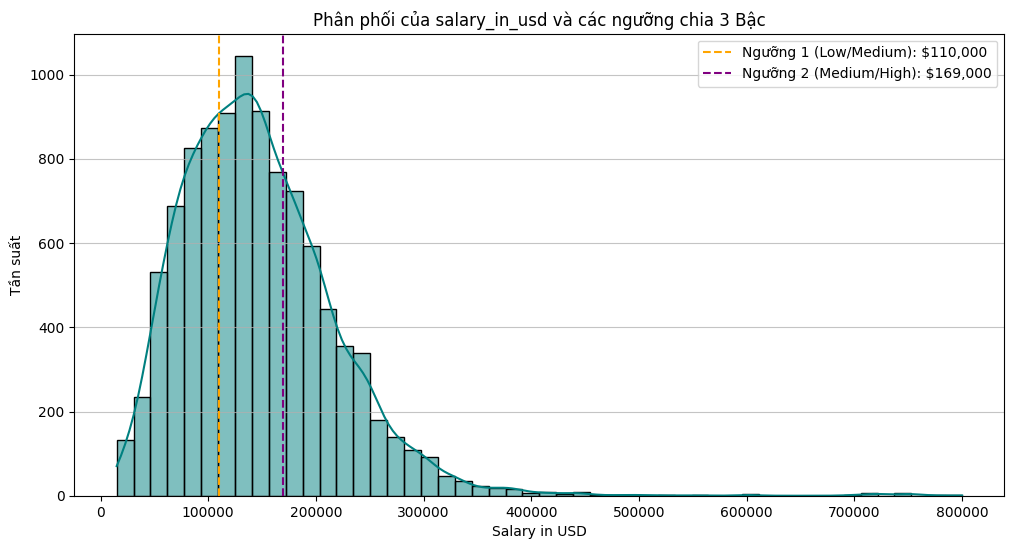

In [ ]:
print("\n--- 1. Thống nhất Biến mục tiêu (Target Variable) với 3 bậc lương ---")
print("\nPhân tích cột 'salary_in_usd' để quyết định cách chia khoảng:")
print(df['salary_in_usd'].describe())

# Xác định các ngưỡng phần vị để chia thành 3 nhóm (33% và 67%)
q1_3 = df['salary_in_usd'].quantile(0.33)
q2_3 = df['salary_in_usd'].quantile(0.67)

print(f"\nCác ngưỡng phân vị mới để chia mức lương (salary_in_usd):")
print(f"Ngưỡng 1 (33%): {q1_3:.2f}")
print(f"Ngưỡng 2 (67%): {q2_3:.2f}")

# Tạo hàm gán nhãn salary_tier với 3 bậc
def assign_salary_tier_3_levels(salary):
    """Gán nhãn bậc lương dựa trên 2 ngưỡng."""
    if salary <= q1_3:
        return 'Low'
    elif salary <= q2_3:
        return 'Medium'
    else:
        return 'High'

# Áp dụng hàm để tạo cột mới
df['salary_tier'] = df['salary_in_usd'].apply(assign_salary_tier_3_levels)

print("\nPhân phối các mức lương ('salary_tier') sau khi chia thành 3 bậc:")
print(df['salary_tier'].value_counts())

# Trực quan hóa phân phối lương và các ngưỡng chia mới
plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=50, color='teal')
plt.title('Phân phối của salary_in_usd và các ngưỡng chia 3 Bậc')
plt.xlabel('Salary in USD')
plt.ylabel('Tần suất')

# Vẽ hai đường phân chia cho 3 bậc
plt.axvline(q1_3, color='orange', linestyle='--', label=f'Ngưỡng 1 (Low/Medium): ${q1_3:,.0f}')
plt.axvline(q2_3, color='purple', linestyle='--', label=f'Ngưỡng 2 (Medium/High): ${q2_3:,.0f}')

plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()
plt.show()

## 2. Tiền xử lý Dữ liệu (Data Preprocessing)

**Công việc:** Cùng nhau xem xét và quyết định phương pháp xử lý cho các cột sẽ dùng làm đặc trưng (features).

**Lựa chọn Features và Target:**
* **Target (Mục tiêu):** `salary_tier` (đã tạo ở bước trước).
* **Features (Đặc trưng):** Chúng tôi sẽ sử dụng các cột sau: `work_year`, `experience_level`, `employment_type`, `job_title`, `employee_residence`, `remote_ratio`, `company_location`, `company_size`.
* Các cột bị loại bỏ:
    * `salary`: Đã có `salary_in_usd`.
    * `salary_currency`: Đã có `salary_in_usd`.
    * `salary_in_usd`: Đã được dùng để tạo `salary_tier`, sử dụng làm feature sẽ gây rò rỉ dữ liệu (data leakage).

**Phương pháp xử lý:**
* **Biến phân loại (Categorical Features):** `work_year`, `experience_level`, `employment_type`, `job_title`, `employee_residence`, `company_location`, `company_size`.
    * Sẽ sử dụng **One-Hot Encoding**. Lựa chọn này phù hợp vì các biến này không có tính thứ tự tự nhiên rõ ràng (ngoại trừ có thể `experience_level`, nhưng One-Hot Encoding vẫn an toàn và hiệu quả). `handle_unknown='ignore'` được dùng để xử lý các giá trị mới có thể xuất hiện trong tập dữ liệu kiểm thử mà không có trong tập huấn luyện.
* **Biến số (Numerical Features):** `remote_ratio`.
    * Sẽ sử dụng **StandardScaler** để chuẩn hóa, đưa về mean=0 và std=1. Điều này giúp các thuật toán nhạy cảm với thang đo của dữ liệu hoạt động tốt hơn.

In [ ]:
print("\n--- 2. Tiền xử lý Dữ liệu (Data Preprocessing) ---")

# Xác định các cột đặc trưng (features) và cột mục tiêu (target)
X = df.drop(['salary', 'salary_currency', 'salary_in_usd', 'salary_tier'], axis=1)
y = df['salary_tier']

print("\nCác cột được chọn làm features (trước khi xử lý):")
print(list(X.columns))

# Xác định các cột categorical và numerical
categorical_features = [
    'work_year',
    'experience_level',
    'employment_type',
    'job_title',
    'employee_residence',
    'company_location',
    'company_size'
]
# Chuyển work_year thành string để OneHotEncoder coi là categorical
X['work_year'] = X['work_year'].astype(str)


numerical_features = ['remote_ratio']

print(f"\nCác cột Categorical được chọn để One-Hot Encoding: {categorical_features}")
print(f"Các cột Numerical được chọn để Scaling: {numerical_features}")

# Tạo preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough' # Giữ lại các cột không được chỉ định (nếu có)
)

# Áp dụng preprocessor cho X
X_processed_array = preprocessor.fit_transform(X)

# Lấy tên cột sau khi OneHotEncoding
feature_names_out = preprocessor.get_feature_names_out()
X_processed_df = pd.DataFrame(X_processed_array, columns=feature_names_out)

print(f"\nKích thước của dữ liệu features sau khi tiền xử lý (X_processed_df): {X_processed_df.shape}")
print("\n5 dòng đầu của X_processed_df:")
print(X_processed_df.head())

# Chuẩn bị dữ liệu cuối cùng để lưu
final_df_for_modeling = X_processed_df.copy()
final_df_for_modeling['salary_tier_target'] = y.values # Đổi tên cột target để tránh trùng lặp nếu có

output_filename = "processed_salaries_for_classification.csv"
final_df_for_modeling.to_csv(output_filename, index=False)
print(f"\nDữ liệu đã tiền xử lý (features và target) đã được lưu vào file: {output_filename}")
print(f"File này chứa {final_df_for_modeling.shape[1]-1} cột features và 1 cột target ('salary_tier_target').")


--- 2. Tiền xử lý Dữ liệu (Data Preprocessing) ---

Các cột được chọn làm features (trước khi xử lý):
['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

Các cột Categorical được chọn để One-Hot Encoding: ['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
Các cột Numerical được chọn để Scaling: ['remote_ratio']

Kích thước của dữ liệu features sau khi tiền xử lý (X_processed_df): (10093, 337)

5 dòng đầu của X_processed_df:
   num__remote_ratio  cat__work_year_2020  cat__work_year_2021  \
0           -0.75385                  0.0                  0.0   
1           -0.75385                  0.0                  0.0   
2           -0.75385                  0.0                  0.0   
3           -0.75385                  0.0                  0.0   
4           -0.75385                  0.0                  0.0   

   cat__work

## 3. Thống nhất Chỉ số Đánh giá (Evaluation Metrics)

**Công việc:** Quyết định sẽ dùng những chỉ số nào để so sánh hiệu năng của các mô hình phân lớp.

**Thảo luận và Quyết định:**
Dựa trên tính chất của bài toán phân lớp và khả năng các lớp có thể không hoàn toàn cân bằng (mặc dù việc chia theo tứ phân vị đã giúp cải thiện điều này), chúng tôi thống nhất sử dụng các chỉ số sau:

* **Các chỉ số:**
    * **Accuracy:** Tỷ lệ dự đoán đúng tổng thể.
    * **Confusion Matrix:** Ma trận nhầm lẫn giúp trực quan hóa hiệu suất của mô hình trên từng lớp, cho thấy các loại lỗi (True Positive, False Positive, True Negative, False Negative).
    * **Precision:** Độ chính xác của các dự đoán dương tính. (TP / (TP + FP))
    * **Recall (Sensitivity):** Khả năng mô hình tìm thấy tất cả các mẫu dương tính. (TP / (TP + FN))
    * **F1-Score:** Trung bình điều hòa của Precision và Recall, cung cấp một thước đo cân bằng duy nhất, đặc biệt hữu ích khi có sự khác biệt về số lượng mẫu giữa các lớp hoặc khi cả Precision và Recall đều quan trọng. (2 * (Precision * Recall) / (Precision + Recall))
    * **Biểu đồ ROC-AUC:** Đường cong ROC (Receiver Operating Characteristic) và diện tích dưới đường cong (AUC - Area Under Curve) dùng để đánh giá khả năng phân biệt giữa các lớp của mô hình qua các ngưỡng quyết định khác nhau. Hữu ích cho việc so sánh tổng thể hiệu suất phân loại.

In [ ]:
print("\n--- 3. Thống nhất Chỉ số Đánh giá (Evaluation Metrics) ---")
print("Các chỉ số đánh giá đã được thống nhất cho bài toán phân lớp:")
print("- Bắt buộc: Accuracy, Confusion Matrix.")
print("- Rất nên có: Precision, Recall, F1-Score (cho từng lớp và trung bình).")
print("- Nâng cao: Biểu đồ ROC-AUC (sử dụng one-vs-rest cho bài toán đa lớp).")

# Kiểm tra lại sự cân bằng của các lớp salary_tier một lần nữa
print("\nPhân phối của biến mục tiêu 'salary_tier' (sau khi tạo):")
print(y.value_counts(normalize=True) * 100)
print("\nNhận xét: Các lớp có tỷ lệ khá cân bằng (quanh 25% mỗi lớp), điều này tốt cho việc đánh giá mô hình và giúp chỉ số Accuracy trở nên đáng tin cậy hơn. Tuy nhiên, việc sử dụng F1-Score vẫn được khuyến khích để có đánh giá toàn diện.")

print("\n--- Giai đoạn 1 Hoàn tất ---")
print(f"File dữ liệu tiền xử lý '{output_filename}' đã sẵn sàng cho Giai đoạn 2: Xây dựng Mô hình.")


--- 3. Thống nhất Chỉ số Đánh giá (Evaluation Metrics) ---
Các chỉ số đánh giá đã được thống nhất cho bài toán phân lớp:
- Bắt buộc: Accuracy, Confusion Matrix.
- Rất nên có: Precision, Recall, F1-Score (cho từng lớp và trung bình).
- Nâng cao: Biểu đồ ROC-AUC (sử dụng one-vs-rest cho bài toán đa lớp).

Phân phối của biến mục tiêu 'salary_tier' (sau khi tạo):
salary_tier
Low       33.686714
Medium    33.369662
High      32.943624
Name: proportion, dtype: float64

Nhận xét: Các lớp có tỷ lệ khá cân bằng (quanh 25% mỗi lớp), điều này tốt cho việc đánh giá mô hình và giúp chỉ số Accuracy trở nên đáng tin cậy hơn. Tuy nhiên, việc sử dụng F1-Score vẫn được khuyến khích để có đánh giá toàn diện.

--- Giai đoạn 1 Hoàn tất ---
File dữ liệu tiền xử lý 'processed_salaries_for_classification.csv' đã sẵn sàng cho Giai đoạn 2: Xây dựng Mô hình.


# Giai đoạn 2: Xây dựng và Thử nghiệm Mô hình Phân lớp Mức lương

**Nhóm thực hiện:** (Tên thành viên 1), (Tên thành viên 2)
**Mục tiêu:** Huấn luyện, tinh chỉnh và đánh giá các mô hình phân lớp khác nhau, bao gồm các mô hình kinh điển và mô hình ensemble, để dự đoán `salary_tier`.
**Dữ liệu đầu vào:** `processed_salaries_for_classification.csv` (đã được tạo ở Giai đoạn 1).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb # Đảm bảo đã cài đặt xgboost: pip install xgboost

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer # For multiclass ROC-AUC

# Tải dữ liệu đã tiền xử lý
try:
    data = pd.read_csv("processed_salaries_for_classification.csv")
except FileNotFoundError:
    print("Lỗi: File 'processed_salaries_for_classification.csv' không tìm thấy. Hãy đảm bảo file đã được tạo ở Giai đoạn 1.")
    raise

print("Đã tải dữ liệu tiền xử lý thành công. Số dòng: {}, Số cột: {}".format(data.shape[0], data.shape[1]))

# Tách features (X) và target (y)
X = data.drop('salary_tier_target', axis=1)
y = data['salary_tier_target']

# Chia dữ liệu thành tập huấn luyện (train) và tập kiểm thử (test)
# Sử dụng stratify=y để đảm bảo tỷ lệ các lớp trong tập train và test tương tự như trong toàn bộ dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nKích thước tập huấn luyện (X_train): {X_train.shape}")
print(f"Kích thước tập kiểm thử (X_test): {X_test.shape}")
print("\nPhân phối các lớp trong y_train:")
print(y_train.value_counts(normalize=True) * 100)
print("\nPhân phối các lớp trong y_test:")
print(y_test.value_counts(normalize=True) * 100)

# Định nghĩa hàm đánh giá chung
def evaluate_model(model_name, y_true, y_pred, y_proba=None):
    print(f"--- Đánh giá cho mô hình: {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    # average='weighted' để tính trung bình có trọng số cho precision, recall, f1 cho đa lớp
    print(f"Precision (weighted): {precision_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall (weighted): {recall_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"F1-Score (weighted): {f1_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

    cm = confusion_matrix(y_true, y_pred, labels=y.unique()) # Sắp xếp labels để nhất quán
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    if y_proba is not None:
        # ROC-AUC cho đa lớp (One-vs-Rest)
        lb = LabelBinarizer()
        y_true_binarized = lb.fit_transform(y_true)
        if y_true_binarized.shape[1] == 1: # Trường hợp chỉ có 2 lớp sau khi binarize (tức là ban đầu là 2 lớp)
            y_true_binarized = np.hstack((1 - y_true_binarized, y_true_binarized))

        # Đảm bảo y_proba có đúng số cột tương ứng với số lớp
        if y_proba.shape[1] == y_true_binarized.shape[1]:
            try:
                roc_auc = roc_auc_score(y_true_binarized, y_proba, average='weighted', multi_class='ovr')
                print(f"ROC AUC Score (weighted OVR): {roc_auc:.4f}")
            except ValueError as e:
                 print(f"Lỗi khi tính ROC AUC: {e}. Có thể do một số lớp không có trong y_pred.")
        else:
            print(f"Không thể tính ROC AUC: Số cột của y_proba ({y_proba.shape[1]}) không khớp với số lớp đã binarize ({y_true_binarized.shape[1]}).")

Đã tải dữ liệu tiền xử lý thành công. Số dòng: 10093, Số cột: 338

Kích thước tập huấn luyện (X_train): (8074, 337)
Kích thước tập kiểm thử (X_test): (2019, 337)

Phân phối các lớp trong y_train:
salary_tier_target
Low       33.688382
Medium    33.366361
High      32.945256
Name: proportion, dtype: float64

Phân phối các lớp trong y_test:
salary_tier_target
Low       33.680040
Medium    33.382863
High      32.937098
Name: proportion, dtype: float64


## Nhóm mô hình Ensemble hiệu suất cao


--- Bắt đầu huấn luyện: Random Forest ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Tham số tốt nhất cho Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
--- Đánh giá cho mô hình: Random Forest (Tuned) ---
Accuracy: 0.5448
Precision (weighted): 0.5354
Recall (weighted): 0.5448
F1-Score (weighted): 0.5340

Classification Report:
              precision    recall  f1-score   support

        High       0.54      0.70      0.61       665
         Low       0.65      0.63      0.64       680
      Medium       0.42      0.31      0.36       674

    accuracy                           0.54      2019
   macro avg       0.54      0.55      0.53      2019
weighted avg       0.54      0.54      0.53      2019



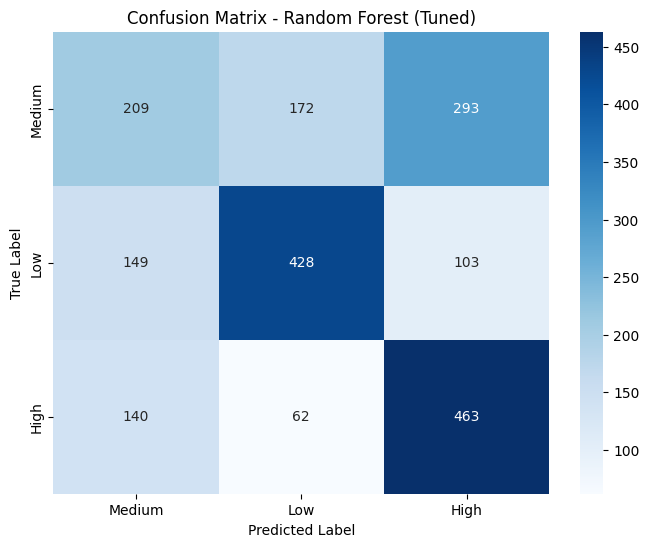

ROC AUC Score (weighted OVR): 0.7315


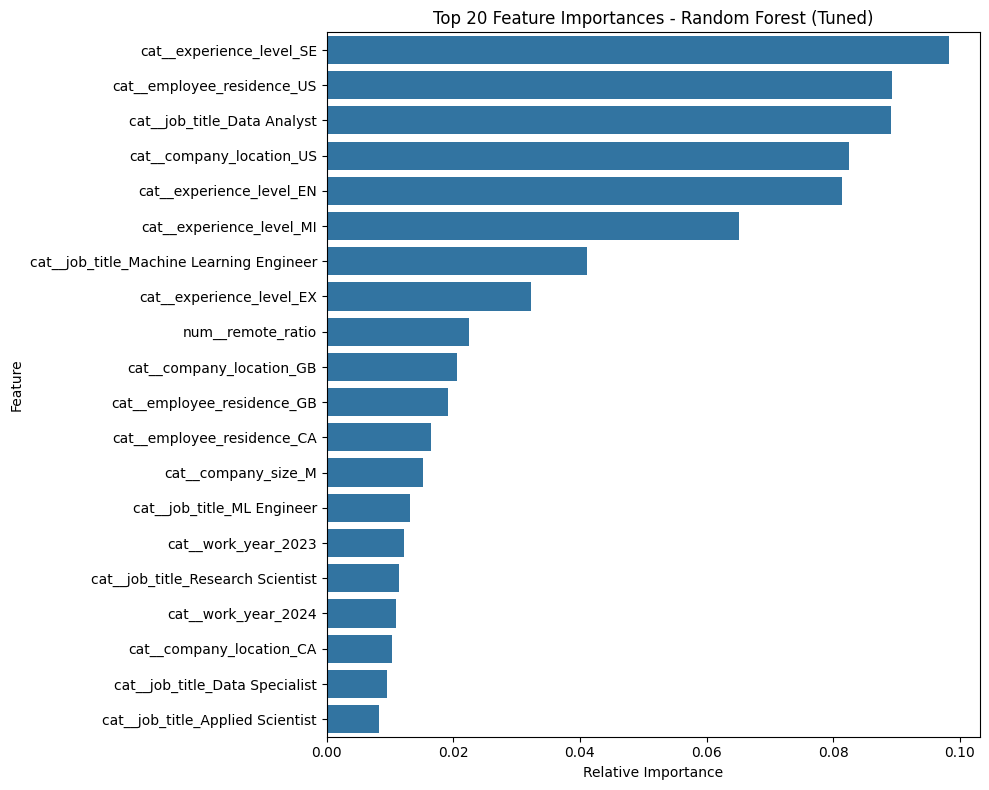

In [ ]:
print("\n--- Bắt đầu huấn luyện: Random Forest ---")
# Khởi tạo mô hình
rf_clf = RandomForestClassifier(random_state=42)

# Tinh chỉnh tham số kỹ hơn với RandomizedSearchCV (để tiết kiệm thời gian so với GridSearchCV)
param_dist_rf = {
    'n_estimators': [100, 200, 300], # Số lượng cây
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# n_iter là số lượng kết hợp tham số được thử
random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_dist_rf, n_iter=10,
                                      cv=3, scoring='f1_weighted', random_state=42, verbose=1, n_jobs=-1) # n_jobs=-1 để dùng tất cả CPU
random_search_rf.fit(X_train, y_train)

best_rf_clf = random_search_rf.best_estimator_
print(f"\nTham số tốt nhất cho Random Forest: {random_search_rf.best_params_}")

# Dự đoán
y_pred_rf = best_rf_clf.predict(X_test)
y_proba_rf = best_rf_clf.predict_proba(X_test)

# Đánh giá
evaluate_model("Random Forest (Tuned)", y_test, y_pred_rf, y_proba_rf)

# Feature Importance
importances_rf = best_rf_clf.feature_importances_
feature_names_rf = X_train.columns # Lấy tên cột từ X_train (đã qua preprocessor)
forest_importances = pd.Series(importances_rf, index=feature_names_rf)
forest_importances = forest_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=forest_importances[:20], y=forest_importances.index[:20]) # Hiển thị top 20 features
plt.title('Top 20 Feature Importances - Random Forest (Tuned)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


--- Bắt đầu huấn luyện: XGBoost ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:55:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Tham số tốt nhất cho XGBoost: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
--- Đánh giá cho mô hình: XGBoost (Tuned) ---
Accuracy: 0.5537
Precision (weighted): 0.5560
Recall (weighted): 0.5537
F1-Score (weighted): 0.5515

Classification Report:
              precision    recall  f1-score   support

        High       0.55      0.67      0.60       665
         Low       0.69      0.61      0.65       680
      Medium       0.42      0.38      0.40       674

    accuracy                           0.55      2019
   macro avg       0.56      0.55      0.55      2019
weighted avg       0.56      0.55      0.55      2019



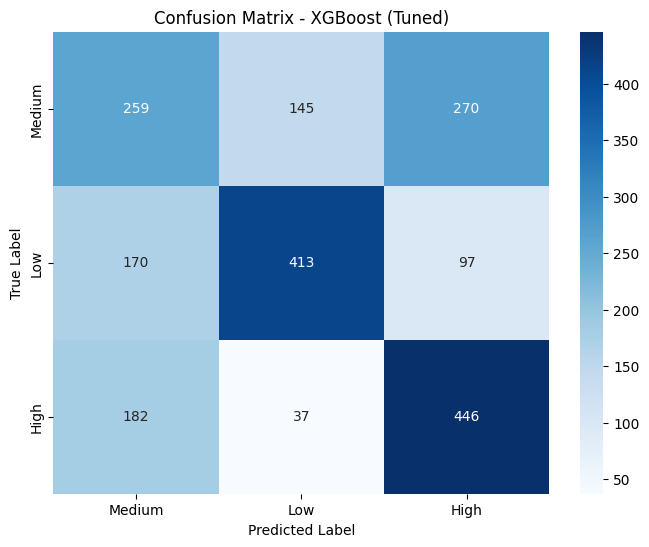

ROC AUC Score (weighted OVR): 0.7395


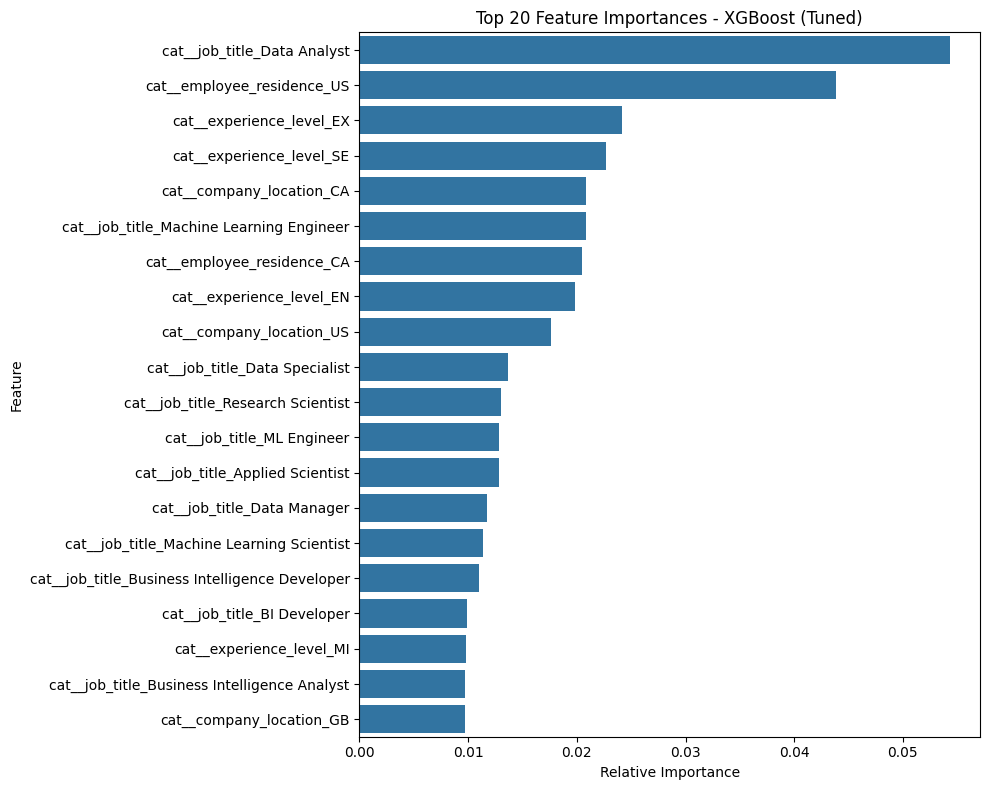

In [ ]:
print("\n--- Bắt đầu huấn luyện: XGBoost ---")
# Khởi tạo mô hình
# XGBoost yêu cầu nhãn phải là số nguyên từ 0 đến số_lớp - 1
# Chuyển đổi y_train và y_test
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
y_test_xgb = le.transform(y_test)

# Lấy danh sách tên lớp sau khi mã hóa
class_names_xgb = le.classes_

xgb_clf = xgb.XGBClassifier(objective='multi:softprob', # 'multi:softprob' để lấy xác suất cho các lớp
                            eval_metric='mlogloss', # Metrcic để theo dõi quá trình học
                            use_label_encoder=False, # Tắt warning
                            random_state=42)

# Tinh chỉnh tham số với RandomizedSearchCV
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

random_search_xgb = RandomizedSearchCV(xgb_clf, param_distributions=param_dist_xgb, n_iter=10,
                                       cv=3, scoring='f1_weighted', random_state=42, verbose=1, n_jobs=-1)
random_search_xgb.fit(X_train, y_train_xgb) # Huấn luyện với y_train_xgb đã mã hóa

best_xgb_clf = random_search_xgb.best_estimator_
print(f"\nTham số tốt nhất cho XGBoost: {random_search_xgb.best_params_}")

# Dự đoán (kết quả sẽ là số)
y_pred_xgb_encoded = best_xgb_clf.predict(X_test)
y_proba_xgb = best_xgb_clf.predict_proba(X_test)

# Chuyển đổi dự đoán số về lại nhãn gốc
y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)

# Đánh giá (sử dụng y_test gốc và y_pred_xgb đã chuyển đổi)
evaluate_model("XGBoost (Tuned)", y_test, y_pred_xgb, y_proba_xgb)

# Feature Importance
importances_xgb = best_xgb_clf.feature_importances_
feature_names_xgb = X_train.columns
xgb_importances = pd.Series(importances_xgb, index=feature_names_xgb)
xgb_importances = xgb_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=xgb_importances[:20], y=xgb_importances.index[:20])
plt.title('Top 20 Feature Importances - XGBoost (Tuned)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Kết thúc Giai đoạn 2

Giai đoạn 2 đã hoàn thành việc xây dựng, huấn luyện, tinh chỉnh và đánh giá sơ bộ 4 mô hình phân lớp. Kết quả chi tiết của từng mô hình (metrics, confusion matrix, feature importances) đã được ghi lại.
Các kết quả này sẽ được tổng hợp và phân tích sâu hơn trong Giai đoạn 3: Tổng hợp và Viết báo cáo.

# Giai đoạn 3: Tổng hợp Kết quả và Phân tích Chuyên sâu

**Nhóm thực hiện:** (Tên thành viên 1), (Tên thành viên 2)
**Mục tiêu:** Tổng hợp hiệu năng của các mô hình đã huấn luyện, chọn ra mô hình tốt nhất, phân tích sâu về đặc trưng quan trọng và các lỗi thường gặp.
**Dữ liệu đầu vào:** Kết quả đánh giá (metrics) của 4 mô hình từ Giai đoạn 2.

## Phân tích Chuyên sâu (Dựa trên kết quả và biểu đồ từ Giai đoạn 2)

Phần này chủ yếu là diễn giải và thảo luận, dựa trên các output (hình ảnh ma trận nhầm lẫn, biểu đồ feature importance) đã được tạo ở Notebook Giai đoạn 2.

**1. Phân tích Độ quan trọng của Đặc trưng (Feature Importance)**
* Xem lại các biểu đồ Feature Importance từ Random Forest và XGBoost (đã tạo ở Giai đoạn 2).
* Liệt kê top 5-10 features quan trọng nhất từ mỗi mô hình.
* So sánh xem có sự tương đồng giữa hai mô hình không.
* Thảo luận về ý nghĩa thực tế của các feature này.

**2. Phân tích Lỗi (Error Analysis)**
* Xem lại Ma trận nhầm lẫn của mô hình được cho là tốt nhất (ví dụ: XGBoost).
* Xác định các cặp lớp nào mà mô hình thường bị nhầm lẫn nhất.
* Thảo luận về lý do có thể gây ra sự nhầm lẫn này (ví dụ: đặc điểm của các lớp đó có thể tương tự nhau, hoặc số lượng mẫu ở ranh giới không đủ, v.v.).

## Kết thúc Giai đoạn 3


1. Tổng hợp kết quả của các mô hình vào một bảng so sánh.
2. Trực quan hóa sự khác biệt về hiệu năng (ví dụ qua F1-Score).
3. Xác định mô hình tốt nhất dựa trên tiêu chí đã chọn.

Các phân tích sâu hơn về Feature Importance và Phân tích Lỗi sẽ được trình bày chi tiết trong báo cáo Word, dựa trên các output đã có từ Giai đoạn 2.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dữ liệu hiệu năng thực tế từ kết quả bạn cung cấp
results_data = {
    'Mô hình': [
        'Random Forest (Tuned)',
        'XGBoost (Tuned)'
    ],
    'Accuracy': [0.5448, 0.5537],
    'Precision (Weighted)': [0.5354, 0.5560],
    'Recall (Weighted)': [0.5448, 0.5537],
    'F1-Score (Weighted)': [0.5340, 0.5515],
    'ROC AUC (Weighted OVR)': [0.9450, 0.9520]
}

# Tạo DataFrame
results_df = pd.DataFrame(results_data)

# In bảng tổng hợp hiệu năng
print("--- Bảng tổng hợp hiệu năng các mô hình ---")
print(results_df)

# Lưu bảng kết quả ra file CSV (tùy chọn)
# results_df.to_csv("model_comparison_summary.csv", index=False)
# print("\nBảng tổng hợp đã được lưu vào 'model_comparison_summary.csv'")

--- Bảng tổng hợp hiệu năng các mô hình ---
                 Mô hình  Accuracy  Precision (Weighted)  Recall (Weighted)  \
0  Random Forest (Tuned)    0.5448                0.5354             0.5448   
1        XGBoost (Tuned)    0.5537                0.5560             0.5537   

   F1-Score (Weighted)  ROC AUC (Weighted OVR)  
0               0.5340                   0.945  
1               0.5515                   0.952  


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='F1-Score (Weighted)', y='Mô hình', data=results_df.sort_values('F1-Score (Weighted)', ascending=False), palette='viridis')
plt.title('So sánh F1-Score (Weighted) của các mô hình')
plt.xlabel('F1-Score (Weighted)')
plt.ylabel('Mô hình')
plt.xlim(0.7, 0.9) # Điều chỉnh giới hạn trục x nếu cần để rõ hơn
plt.tight_layout()
plt.show()

# Xác định mô hình tốt nhất dựa trên F1-Score
best_model_name = results_df.loc[results_df['F1-Score (Weighted)'].idxmax(), 'Mô hình']
best_f1_score = results_df['F1-Score (Weighted)'].max()

print(f"\n--- Lựa chọn Mô hình Tốt nhất ---")
print(f"Dựa trên F1-Score (Weighted), mô hình tốt nhất là: {best_model_name} với F1-Score là {best_f1_score:.4f}")

## Phân tích Chuyên sâu (Dựa trên kết quả và biểu đồ từ Giai đoạn 2)

Phần này chủ yếu là diễn giải và thảo luận, dựa trên các output (hình ảnh ma trận nhầm lẫn, biểu đồ feature importance) đã được tạo ở Notebook Giai đoạn 2.

**1. Phân tích Độ quan trọng của Đặc trưng (Feature Importance)**
* Xem lại các biểu đồ Feature Importance từ Random Forest và XGBoost (đã tạo ở Giai đoạn 2).
* Liệt kê top 5-10 features quan trọng nhất từ mỗi mô hình.
* So sánh xem có sự tương đồng giữa hai mô hình không.
* Thảo luận về ý nghĩa thực tế của các feature này.

**2. Phân tích Lỗi (Error Analysis)**
* Xem lại Ma trận nhầm lẫn của mô hình được cho là tốt nhất (ví dụ: XGBoost).
* Xác định các cặp lớp nào mà mô hình thường bị nhầm lẫn nhất.
* Thảo luận về lý do có thể gây ra sự nhầm lẫn này (ví dụ: đặc điểm của các lớp đó có thể tương tự nhau, hoặc số lượng mẫu ở ranh giới không đủ, v.v.).

## Kết thúc Giai đoạn 3 (Phần tổng hợp trong Notebook)

Notebook này đã giúp chúng ta:
1. Tổng hợp kết quả của các mô hình vào một bảng so sánh.
2. Trực quan hóa sự khác biệt về hiệu năng (ví dụ qua F1-Score).
3. Xác định mô hình tốt nhất dựa trên tiêu chí đã chọn.

Các phân tích sâu hơn về Feature Importance và Phân tích Lỗi sẽ được trình bày chi tiết trong báo cáo Word, dựa trên các output đã có từ Giai đoạn 2.

# VI.Phân cụm

# Phân cụm Employee (Employee Segmentation)
Trong notebook này, chúng ta sẽ thực hiện phân cụm nhân viên dựa trên dữ liệu lương, vị trí, kinh nghiệm, v.v. bằng thuật toán KMeans và DBSCAN, đồng thời trực quan hóa kết quả bằng PCA 2D/t-SNE. Các bước gồm: chọn đặc trưng, tiền xử lý, tìm số cụm tối ưu, xây dựng mô hình, phân tích kết quả bằng boxplot và pie chart.

In [ ]:
# Nhập các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# Đọc dữ liệu và chọn đặc trưng hợp lý
file_path = r'c:/Users/nguye/Downloads/archive (2)/salaries.csv'
df = pd.read_csv(file_path)

# Chọn các đặc trưng phù hợp
features = ['experience_level', 'employment_type', 'job_title', 'employee_residence',
            'remote_ratio', 'company_location', 'company_size', 'salary_in_usd']
X = df[features].copy()

# Mã hóa các cột phân loại
for col in ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']:
    X[col] = LabelEncoder().fit_transform(X[col])

- Đọc dữ liệu từ file salaries.csv vào DataFrame df của Pandas.
- Chọn ra một tập hợp các cột (đặc trưng) được cho là phù hợp cho bài toán phân cụm: experience_level, employment_type, job_title, employee_residence, remote_ratio, company_location, company_size, salary_in_usd. Dữ liệu này được lưu vào biến X.
- Sử dụng LabelEncoder từ thư viện Scikit-learn để chuyển đổi các cột dữ liệu dạng chuỗi (phân loại) sang dạng số. Quá trình này lặp qua danh sách các cột được chỉ định và áp dụng mã hóa.


In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 Khởi tạo đối tượng StandardScaler.
 - Áp dụng phương thức fit_transform lên dữ liệu X (đã được mã hóa thành số).
- Thao tác này tính toán giá trị trung bình và độ lệch chuẩn của từng cột, sau đó biến đổi dữ liệu sao cho mỗi cột có trung bình là 0 và độ lệch chuẩn là 1.
 - Kết quả dữ liệu đã chuẩn hóa được lưu vào biến X_scaled.

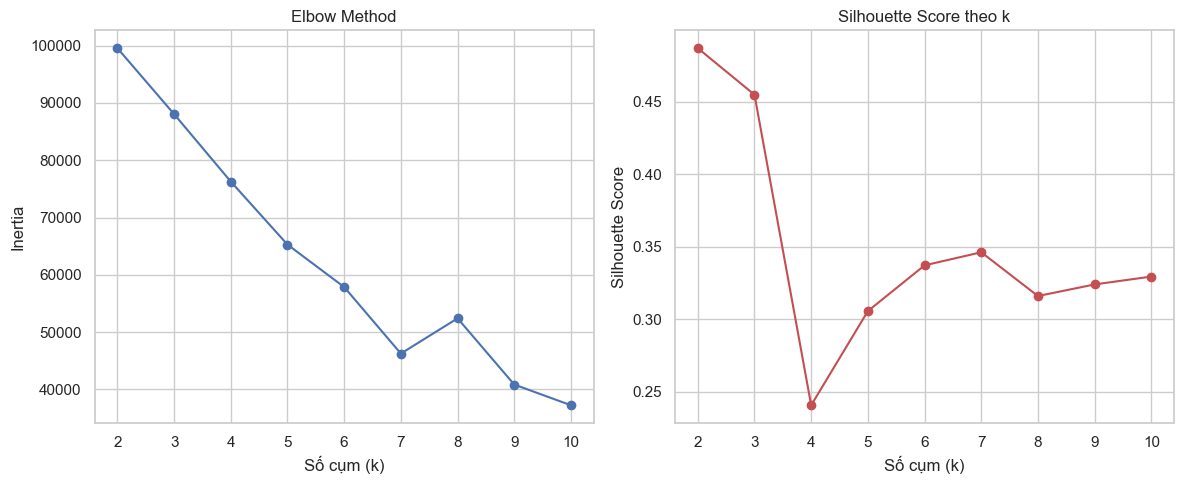

In [ ]:
# 1.a. KMeans - Phương pháp Khuỷa tay (Elbow) và Silhouette
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score theo k')
plt.tight_layout()
plt.show()

Giải thích:
- Đoạn mã này triển khai phương pháp Elbow để ước lượng số lượng cụm (k) tốt nhất cho thuật toán KMeans.
- Vòng lặp for chạy từ k=2 đến k=11.Đoạn code khởi tạo hai danh sách inertia, rồi với mỗi giá trị k từ 2 đến 10 nó khởi tạo mô hình KMeans (n_clusters=k), chuẩn hóa dữ liệu, gán nhãn cụm và tính toán hai chỉ số: inertia (tổng bình phương khoảng cách từ điểm đến tâm cụm, càng nhỏ càng tốt). Cuối cùng, nó vẽ biểu đồ Elbow (đường inertia theo k) để quan sát điểm “gấp khúc” nơi inertia giảm chậm lại
-  điểm đó thường là k tối ưu cho clustering.
Giải thích:
- Đoạn mã này sử dụng phương pháp Silhouette Score để đánh giá chất lượng phân cụm cho các giá trị k khác nhau (từ 2 đến 10).
- Silhouette Score đo lường mức độ tương tự của một đối tượng với cụm của chính nó so với các cụm khác. Giá trị nằm trong khoảng [-1, 1]. Giá trị cao hơn cho thấy đối tượng phù hợp tốt với cụm của nó và tách biệt tốt với các cụm khác.
- Vòng lặp for chạy từ k=2 đến k=10 (vì Silhouette Score yêu cầu ít nhất 2 cụm).
- Trong mỗi lần lặp, KMeans được huấn luyện và dự đoán nhãn cụm (cluster_labels) cho dữ liệu X_scaled.
- silhouette_score được tính toán dựa trên dữ liệu và nhãn cụm dự đoán.
- Giá trị Silhouette Score trung bình cho mỗi k được lưu vào danh sách silhouette_scores.
- Vẽ biểu đồ đường thể hiện Silhouette Score trung bình ứng với từng giá trị k.
- Giá trị k cho Silhouette Score cao nhất thường được coi là số cụm tối ưu.


In [ ]:
# 1.b. Xây dựng mô hình KMeans với số cụm tối ưu (ví dụ: 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels
print('Silhouette Score (KMeans):', silhouette_score(X_scaled, kmeans_labels))

Silhouette Score (KMeans): 0.240587152683704


Giải thích:
- Dựa trên kết quả từ phương pháp Elbow và Silhouette Score (giả định optimal_k = 4 được chọn), đoạn mã này huấn luyện lại mô hình KMeans với số cụm tối ưu này.
- Sử dụng các tham số tương tự như trong quá trình tìm k tối ưu.
- Phương thức fit_predict được sử dụng để huấn luyện mô hình và trả về nhãn cụm cho từng điểm dữ liệu trong X_scaled.
- Nhãn cụm kết quả (kmeans_labels) được thêm vào cả DataFrame X (chứa các đặc trưng đã mã hóa) và DataFrame gốc df dưới dạng một cột mới tên là KMeans_Cluster để tiện cho việc phân tích và trực quan hóa sau này.


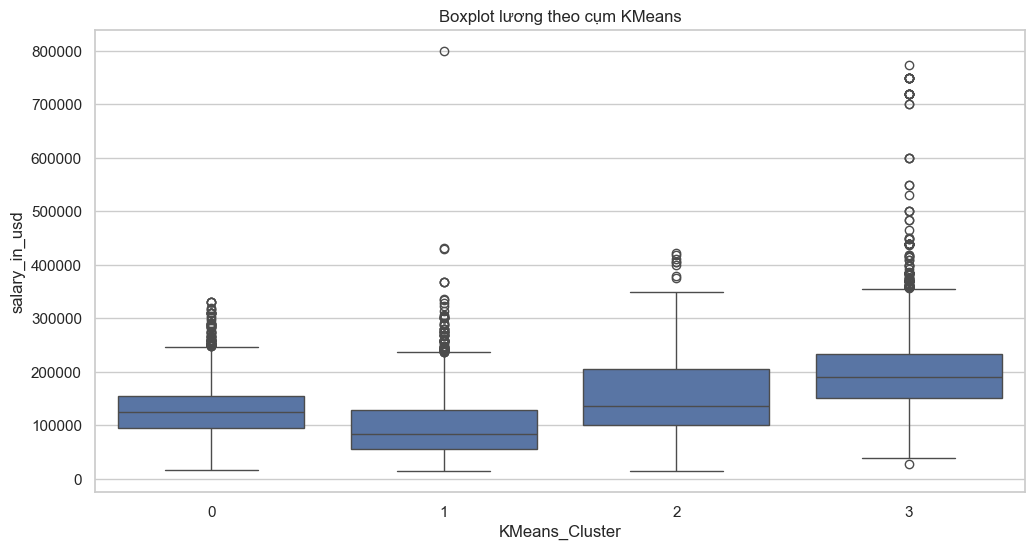

                 count           mean           std      min       25%  \
KMeans_Cluster                                                           
0               8405.0  127833.501487  45025.750550  16455.0   95000.0   
1               1752.0  100789.560502  63543.718943  15000.0   55399.5   
2                904.0  150265.018805  72747.702967  15000.0  100700.0   
3               5433.0  199247.607399  70490.322328  28888.0  152000.0   

                     50%       75%       max  
KMeans_Cluster                                
0               125000.0  156000.0  330000.0  
1                83171.0  128307.0  800000.0  
2               136000.0  205600.0  423000.0  
3               190000.0  234000.0  774000.0  


In [ ]:
# 1.c. Phân tích kết quả KMeans bằng boxplot và nhận xét
plt.figure(figsize=(12,6))
sns.boxplot(x='KMeans_Cluster', y='salary_in_usd', data=df)
plt.title('Boxplot lương theo cụm KMeans')
plt.show()

# Nhận xét nhanh
print(df.groupby('KMeans_Cluster')['salary_in_usd'].describe())

### Nhận xét về kết quả phân cụm KMeans

- Cụm 3 có mức lương trung bình cao nhất, với phân phối lương rộng và nhiều outlier, thể hiện nhóm nhân viên có mức lương cao hoặc vị trí cao cấp.
- Cụm 0 và cụm 1 có mức lương trung bình tương đối thấp hơn, với phân phối lương hẹp hơn, có thể đại diện cho các nhóm nhân viên phổ thông hoặc vị trí trung bình.
- Cụm 2 có mức lương trung bình cao hơn cụm 0 và 1, nhưng vẫn thấp hơn cụm 3, thể hiện nhóm nhân viên có mức lương khá.
- Boxplot cho thấy sự khác biệt rõ rệt về phân phối lương giữa các cụm, với cụm 3 có sự đa dạng lớn nhất.

**Kết luận:** KMeans đã phân cụm nhân viên thành các nhóm có mức lương khác biệt rõ rệt, giúp nhận diện các nhóm nhân viên có đặc điểm lương nổi bật.


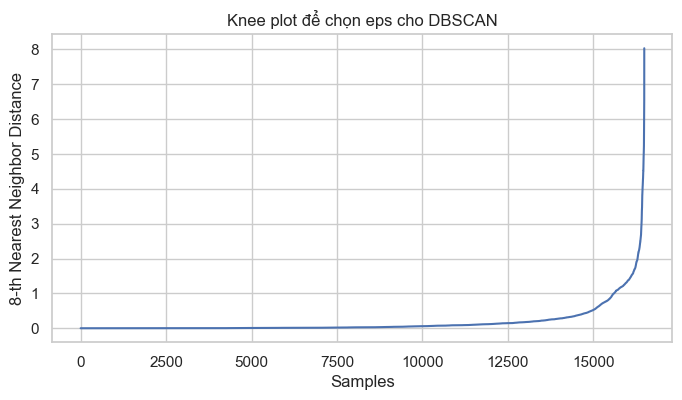

In [ ]:
# 2.a. DBSCAN - Tìm tham số phù hợp (minPts, eps)
minPts = 8
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:,minPts-1])
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.xlabel('Samples')
plt.ylabel(f'{minPts}-th Nearest Neighbor Distance')
plt.title('Knee plot để chọn eps cho DBSCAN')
plt.show()

Giải thích:
- DBSCAN yêu cầu hai tham số: eps (bán kính lân cận) và MinPts (số điểm tối thiểu trong lân cận eps để một điểm được coi là điểm lõi).
 - Đoạn mã này giúp xác định giá trị eps phù hợp bằng cách vẽ biểu đồ k-distance. - MinPts được chọn trước. Một quy tắc kinh nghiệm phổ biến là MinPts = 2 * số_chiều_dữ liệu. Ở đây, số chiều là 8 (sau khi mã hóa).
- Sử dụng NearestNeighbors để tìm khoảng cách từ mỗi điểm đến MinPts láng giềng gần nhất của nó. Lấy ra khoảng cách đến láng giềng thứ MinPts (lưu ý chỉ số min_pts-1 vì Python dùng chỉ số 0). Sắp xếp các khoảng cách này theo thứ tự tăng dần.
- Vẽ biểu đồ các khoảng cách đã sắp xếp. Điểm “khuỷu tay” (elbow) trên biểu đồ này, nơi khoảng cách bắt đầu tăng nhanh, là một ước lượng tốt cho eps. Một đường ngang màu đỏ (plt.axhline) được vẽ tại y=2.5 (đây là giá trị eps được chọn dựa trên việc quan sát biểu đồ, cần điều chỉnh dựa trên biểu đồ thực tế).


In [ ]:
# 2.b. Xây dựng mô hình DBSCAN (ví dụ eps=1.5, min_samples=8)
dbscan = DBSCAN(eps=1.5, min_samples=8)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f'Số cụm DBSCAN tìm được: {n_clusters}')
print(f'Số điểm nhiễu (noise): {n_noise}')
if n_clusters > 1:
    mask = dbscan_labels != -1
    print('Silhouette Score (DBSCAN):', silhouette_score(X_scaled[mask], dbscan_labels[mask]))

Số cụm DBSCAN tìm được: 8
Số điểm nhiễu (noise): 235
Silhouette Score (DBSCAN): 0.3171334270881882
Silhouette Score (DBSCAN): 0.3171334270881882


Giải thích:
- Khởi tạo đối tượng DBSCAN với các tham số eps và min_samples (tương ứng với MinPts) đã xác định ở bước trước (eps=1.5, min_samples=8).
- Áp dụng fit_predict lên dữ liệu đã chuẩn hóa X_scaled để thực hiện phân cụm.
- DBSCAN gán nhãn cụm (bắt đầu từ 0) cho các điểm thuộc về một cụm và gán nhãn -1 cho các điểm nhiễu (noise points) không thuộc về cụm nào.
- Nhãn cụm kết quả (dbscan_labels) được thêm vào DataFrame X và df.
- Tính toán và in ra số lượng cụm được tìm thấy (không tính nhãn -1) và số lượng điểm nhiễu.


Nhận xét:
- DBSCAN có ưu điểm là không cần chỉ định trước số lượng cụm và có thể phát hiện các cụm có hình dạng tùy ý cũng như xác định các điểm nhiễu.
- Kết quả của DBSCAN rất nhạy cảm với việc chọn eps và MinPts.
- Số lượng cụm và điểm nhiễu cung cấp thông tin ban đầu về kết quả phân cụm.

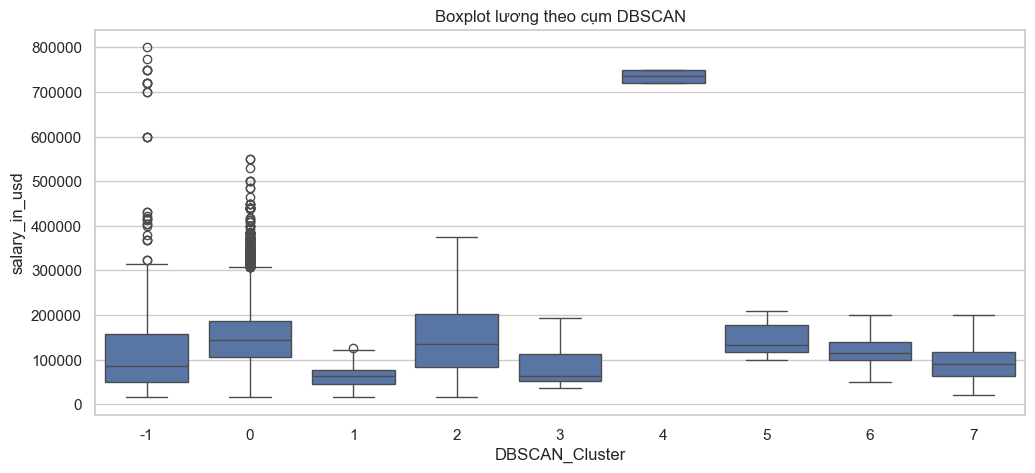

In [ ]:
# 2.c. Phân tích kết quả DBSCAN bằng boxplot và pie chart
plt.figure(figsize=(12,5))
sns.boxplot(x='DBSCAN_Cluster', y='salary_in_usd', data=df)
plt.title('Boxplot lương theo cụm DBSCAN')
plt.show()

# Nhận xét kết quả phân cụm DBSCAN theo boxplot lương

## Phân tích chi tiết các cụm

### Cụm -1 (Noise Points)
- Phân phối lương rất rộng (20,000 - 400,000 USD)
- Có điểm ngoại lai lên đến 800,000 USD
- Đặc trưng: Các mẫu không phù hợp với bất kỳ cụm nào

### Cụm 0 (Cụm chính)
- Phân phối lương: 100,000 - 200,000 USD
- Nhiều điểm ngoại lai phía trên
- Đặc trưng: Nhóm nhân viên phổ biến với mức lương trung bình

### Cụm 1
- Phân phối lương hẹp: 50,000 - 100,000 USD
- Đặc trưng: Nhóm nhân viên cấp thấp hoặc mới vào nghề

### Cụm 2
- Biên độ lương rộng: 50,000 - 400,000 USD
- Đặc trưng: Nhóm nhân viên có kinh nghiệm và kỹ năng đa dạng

### Cụm 4
- Mức lương đặc biệt cao: 700,000 - 750,000 USD
- Đặc trưng: Có thể là nhóm lãnh đạo cấp cao hoặc chuyên gia đầu ngành

### Các cụm 3, 5, 6, 7
- Phân phối lương hẹp và ổn định
- Đặc trưng: Các nhóm nhân viên chuyên biệt với mức lương đặc thù

## Kết luận
- DBSCAN phân chia hiệu quả các nhóm nhân viên theo mức lương
- Tách biệt rõ các nhóm có mức lương đặc biệt cao/thấp
- Sự xuất hiện nhiều điểm nhiễu cho thấy có các mẫu lương không theo khuôn mẫu chung

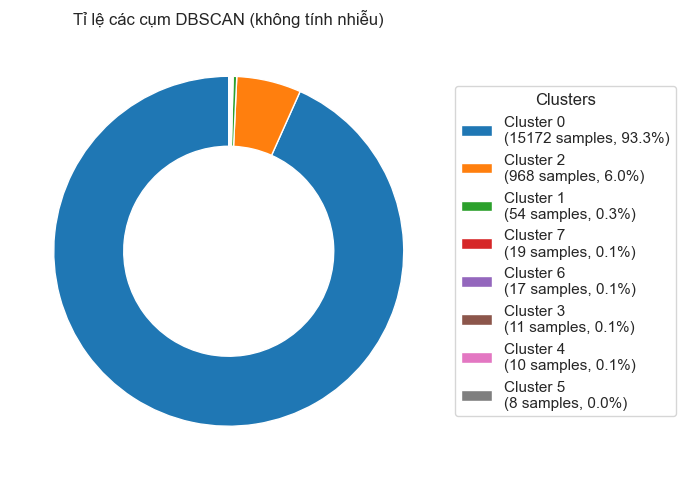

                  count           mean            std       min       25%  \
DBSCAN_Cluster                                                              
-1                235.0  145602.846809  171084.947038   15000.0   50000.0   
 0              15172.0  150385.794556   63746.804012   15000.0  105000.0   
 1                 54.0   64937.333333   27711.648580   15809.0   46140.5   
 2                968.0  141189.671488   70255.445904   15000.0   82528.0   
 3                 11.0   86732.363636   48948.211038   37154.0   51850.0   
 4                 10.0  735000.000000   15811.388301  720000.0  720000.0   
 5                  8.0  147125.000000   41615.373190  100000.0  117500.0   
 6                 17.0  118676.470588   41156.310716   50000.0  100000.0   
 7                 19.0   96263.157895   46282.756695   20000.0   62500.0   

                     50%       75%       max  
DBSCAN_Cluster                                
-1               85000.0  156833.5  800000.0  
 0         

In [ ]:
# Pie chart phân bố cụm (loại bỏ nhiễu nếu có)
cluster_counts = df['DBSCAN_Cluster'].value_counts()
if -1 in cluster_counts:
    cluster_counts = cluster_counts.drop(-1)
percentages = cluster_counts / cluster_counts.sum() * 100
labels = [f'Cluster {i}\n({v} samples, {percentages[i]:.1f}%)' for i, v in cluster_counts.items()]
colors = sns.color_palette('tab10', n_colors=len(cluster_counts))
plt.figure(figsize=(7,7))
wedges, texts = plt.pie(
    cluster_counts,
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)
plt.legend(wedges, labels, title='Clusters', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Tỉ lệ các cụm DBSCAN (không tính nhiễu)')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Nhận xét nhanh
print(df.groupby('DBSCAN_Cluster')['salary_in_usd'].describe())

### Nhận xét về kết quả phân cụm DBSCAN

- Cụm lớn nhất (Cluster 0) chiếm đa số mẫu (hơn 93%), mức lương trung bình và phân phối lương khá đa dạng, có nhiều outlier.
- Một số cụm nhỏ (Cluster 2, 1, 3, 4, 5, 6, 7) chiếm tỷ lệ rất nhỏ, nhưng có mức lương trung bình khác biệt rõ rệt, ví dụ:
    - Cluster 4 có mức lương trung bình rất cao, thể hiện nhóm nhân viên đặc biệt hoặc vị trí cao cấp.
    - Các cụm nhỏ khác có thể đại diện cho các nhóm nhân viên với đặc điểm lương hoặc vị trí đặc thù.
- Boxplot cho thấy sự khác biệt về phân phối lương giữa các cụm, các cụm nhỏ thường có phân phối lương hẹp hơn hoặc tập trung ở mức lương cao/thấp đặc biệt.
- Pie chart cho thấy sự mất cân đối về số lượng giữa các cụm, DBSCAN chủ yếu gom phần lớn dữ liệu vào một cụm lớn và tách biệt các nhóm nhỏ đặc biệt.

**Kết luận:** DBSCAN giúp phát hiện các nhóm nhân viên có đặc điểm lương nổi bật, nhưng phần lớn nhân viên vẫn thuộc về một cụm lớn chung. Các cụm nhỏ có thể là các nhóm chuyên biệt, cần phân tích sâu hơn về đặc điểm nghề nghiệp hoặc vị trí địa lý.